# ANÁLISIS ESTADÍSTICO MULTIVARIADO
Se presentan algunas rutinas básicas para el Análisis de Componentes Principales y de Agrupamiento (Cluster) utilizando resultados de análisis fisicoquímicos de agua subterránea (Proyecto MEGIA, UNAL (2020)). Las concentraciones se reportan en meq/L.
Para la preparación de la base de datos, se generan algunos estadísticos y gráficos descriptivos, evaluación de la normalidad de los parámetros y estandarización de los datos.

In [1]:
# Paquetes a instalar
#%pip install seaborn
#%pip install sklearn
#%pip install statsmodels
#%pip install stats

In [2]:
import matplotlib.pyplot as plt #Plotting data
import matplotlib.patches as mpatches #Making custom legends for figures
import pandas as pd #Data tables 
import seaborn as sns #Extra plotting functions with better style
import numpy as np #Math functions and arrays
from scipy.stats import linregress,norm,ttest_ind,zscore #Stats functions
import statsmodels.api as sm #More stats functions
from sklearn.decomposition import PCA #Machine learning 
from sklearn import datasets #Load Iris data
from sklearn.cluster import KMeans #More machine learning
from sklearn.preprocessing import scale

from scipy import stats
import pingouin as pg

#Makes plot format look nice
sns.set(context= 'talk',style='ticks',font_scale=1,rc ={'axes.spines.right': False,'axes.spines.top': False},palette='colorblind')

In [3]:
ruta_archivo_excel = 'Data/Datos.xlsx'

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel(ruta_archivo_excel)
df.head(4)

C:\Users\Equipo\AppData\Roaming\Python\Python39\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


ID       long       lat       tipo        Mg    Ca        Na  \
0  M-33007 -73.622573  8.313617  Manantial  0.246914  1.55  1.508696   
1  M-33008 -73.603305  8.310222     Aljibe  0.164609  1.20  1.273913   
2  M-33010 -73.681288  8.330253       Pozo  0.246914  0.75  0.360870   
3  M-33011 -73.700388  8.330850       Pozo  0.576132  0.80  1.226087   

          K  HCO3        Cl  ...  UG_SuperficialCorto  Numero_edad  \
0  0.115385  1.70  1.695775  ...                  Qca          114   
1  0.117949  1.62  1.216901  ...                  Qca          115   
2  0.066667  2.52  0.135211  ...                  Qca          116   
3  0.071795  2.24  0.016901  ...                  Qca          117   

   Edad_Superficial  Norte_Sur_Cimitarra  Numero_Ub  Geomorfologia  \
0       Cuaternario                NORTE        151            NaN   
1       Cuaternario                NORTE        150            NaN   
2       Cuaternario                NORTE        162            NaN   
3       Cuaternario                NORTE        163            NaN   

       sub/sup  FormaciónEnProf Formacion Geologica Numero_edad2  
0  Subterranea                0                 Qca          608  
1  Subterranea               ND                  ND          208  
2  Subterranea               ND                  ND          209  
3  Subterranea               ND                  ND          210  

[4 rows x 35 columns]

In [4]:
list(df.columns)

['ID',
 'long',
 'lat',
 'tipo',
 'Mg',
 'Ca',
 'Na',
 'K',
 'HCO3',
 'Cl',
 'SO4',
 'NO3',
 'NaK',
 'pH',
 'TEMP ',
 'BE_ABS',
 'COND_ELE ',
 'SDT ',
 'Ref_mascara',
 'Info Adicional',
 'Numero',
 'Profundidad_(m)',
 'MES',
 'AÑO',
 'UG_Superficial',
 'UG_SuperficialCorto',
 'Numero_edad',
 'Edad_Superficial',
 'Norte_Sur_Cimitarra',
 'Numero_Ub',
 'Geomorfologia',
 'sub/sup',
 'FormaciónEnProf',
 'Formacion Geologica',
 'Numero_edad2']

In [5]:
#Seleccionar una columna
df.pH

0      6.03
1      6.27
2      7.62
3      6.49
4      6.93
       ... 
114    7.73
115    7.25
116    6.34
117    6.78
118    8.53
Name: pH, Length: 119, dtype: float64

In [6]:
#Seleccionar una columna
df['tipo']

0      Manantial
1         Aljibe
2           Pozo
3           Pozo
4           Pozo
         ...    
114         Pozo
115         Pozo
116         Pozo
117         Pozo
118         Pozo
Name: tipo, Length: 119, dtype: object

In [7]:
#Eliminar información no numérica de la base de datos
df1 = df[['ID', 'tipo','Mg','Na','Ca','K','HCO3','Cl','SO4','NO3','NaK','pH']]
#Estadísticos básicos por parámetro.
df1.describe(include='all')

ID  tipo          Mg          Na          Ca           K  \
count       119   119  119.000000  119.000000  119.000000  119.000000   
unique      119     3         NaN         NaN         NaN         NaN   
top     M-33007  Pozo         NaN         NaN         NaN         NaN   
freq          1    98         NaN         NaN         NaN         NaN   
mean        NaN   NaN    0.491409    1.177311    0.779370    0.070860   
std         NaN   NaN    0.529511    1.429011    0.668876    0.064670   
min         NaN   NaN    0.000082    0.000000    0.005000    0.003333   
25%         NaN   NaN    0.164609    0.352174    0.300000    0.033333   
50%         NaN   NaN    0.411523    0.821739    0.700000    0.053846   
75%         NaN   NaN    0.658436    1.286957    1.200000    0.084615   
max         NaN   NaN    3.786008   10.930435    3.800000    0.543590   

              HCO3          Cl           SO4        NO3         NaK  \
count   119.000000  119.000000  1.190000e+02  93.000000  119.000000   
unique         NaN         NaN           NaN        NaN         NaN   
top            NaN         NaN           NaN        NaN         NaN   
freq           NaN         NaN           NaN        NaN         NaN   
mean      2.133247    0.376409  1.250000e-03   0.125782    1.248171   
std       1.636210    0.629435  8.710292e-19   0.196729    1.426504   
min       0.016393    0.002817  1.250000e-03   0.001613    0.015385   
25%       0.810000    0.056338  1.250000e-03   0.012903    0.430602   
50%       2.160000    0.157746  1.250000e-03   0.046774    0.920178   
75%       2.860000    0.326761  1.250000e-03   0.132258    1.373133   
max       8.200000    3.904225  1.250000e-03   0.879032   10.971460   

                pH  
count   118.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean      6.672881  
std       0.949234  
min       4.200000  
25%       6.310000  
50%       6.825000  
75%       7.220000  
max       8.710000

In [8]:
# Eliminar filas con celdas vacias
df2 = df1.dropna()
df2

ID       tipo        Mg        Na    Ca         K  HCO3        Cl  \
0    M-33007  Manantial  0.246914  1.508696  1.55  0.115385  1.70  1.695775   
1    M-33008     Aljibe  0.164609  1.273913  1.20  0.117949  1.62  1.216901   
2    M-33010       Pozo  0.246914  0.360870  0.75  0.066667  2.52  0.135211   
3    M-33011       Pozo  0.576132  1.226087  0.80  0.071795  2.24  0.016901   
4    M-33012       Pozo  0.493827  1.291304  0.30  0.069231  1.94  0.292958   
..       ...        ...       ...       ...   ...       ...   ...       ...   
113  M-35950       Pozo  0.164609  1.260870  0.70  0.166667  2.30  0.108169   
114  M-35951       Pozo  0.082305  2.134783  0.45  0.020513  2.76  0.028732   
116  M-35953       Pozo  0.164609  2.339130  0.10  0.076923  2.54  0.411268   
117  M-35954       Pozo  0.576132  1.008696  0.70  0.102564  1.92  0.185915   
118  M-35955       Pozo  3.786008  0.178261  1.80  0.543590  8.20  0.002817   

         SO4       NO3       NaK    pH  
0    0.00125  0.762903  1.624080  6.03  
1    0.00125  0.477419  1.391862  6.27  
2    0.00125  0.051613  0.427536  7.62  
3    0.00125  0.017742  1.297882  6.49  
4    0.00125  0.006452  1.360535  6.93  
..       ...       ...       ...   ...  
113  0.00125  0.004355  1.427536  7.33  
114  0.00125  0.002742  2.155295  7.73  
116  0.00125  0.061290  2.416054  6.34  
117  0.00125  0.132258  1.111260  6.78  
118  0.00125  0.006452  0.721851  8.53  

[92 rows x 12 columns]

In [9]:
#Cálculo del Z-Score (número de desviaciones estándar que un dato de una muestra se aparta de su media)

iris = df2[['Mg','Na','Ca','K','HCO3','Cl','SO4','NO3','NaK','pH']]
iris_norm = pd.DataFrame(data=None,index=iris.index,columns=iris.columns[:-1]) #first make a copy of the iris table minus the species column containing no data
for col in iris.columns[:-1]: #Loop through each column except the species column
    iris_norm[col] = (iris[col]-iris[col].mean())/iris[col].std()# For each column subtract column mean from all values and then divide by standard deviation, insert these transformed values into the new table
iris_norm.mean()

Mg     -1.641199e-16
Na     -6.154497e-17
Ca     -4.827057e-18
K      -1.930823e-17
HCO3    5.985550e-16
Cl     -1.423982e-16
SO4    -9.945504e-01
NO3     2.896234e-17
NaK    -1.086088e-17
dtype: float64

In [10]:
# Matriz de correlación
matriz_pearson = iris.corr(method='pearson')
print(matriz_pearson)


            Mg        Na        Ca         K      HCO3        Cl  SO4  \
Mg    1.000000  0.113452  0.471381  0.455919  0.626598  0.073396  NaN   
Na    0.113452  1.000000  0.275915 -0.030758  0.552453  0.171585  NaN   
Ca    0.471381  0.275915  1.000000  0.189078  0.654925  0.263639  NaN   
K     0.455919 -0.030758  0.189078  1.000000  0.188995  0.375188  NaN   
HCO3  0.626598  0.552453  0.654925  0.188995  1.000000 -0.052174  NaN   
Cl    0.073396  0.171585  0.263639  0.375188 -0.052174  1.000000  NaN   
SO4        NaN       NaN       NaN       NaN       NaN       NaN  NaN   
NO3  -0.140315 -0.023818  0.017528  0.338736 -0.280313  0.529660  NaN   
NaK   0.134674  0.998921  0.284796  0.015691  0.561427  0.189076  NaN   
pH    0.330534  0.483517  0.428045  0.085383  0.735154 -0.133349  NaN   

           NO3       NaK        pH  
Mg   -0.140315  0.134674  0.330534  
Na   -0.023818  0.998921  0.483517  
Ca    0.017528  0.284796  0.428045  
K     0.338736  0.015691  0.085383  
HCO3 -0.280

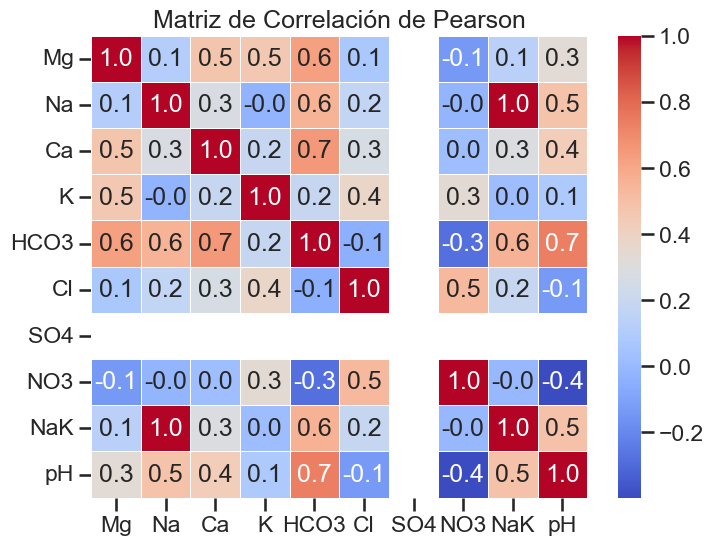

In [11]:
#Figura de matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_pearson, annot=True, fmt=".1f",cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación de Pearson')
plt.show()

Se observa que Na y NaK tiene una alta correlación,iris = iris.drop('SO4', axis=1)
iris.head(3) siendo una variable reundante. Se decide eliminar NaK.

In [12]:
iris = iris.drop('NaK', axis=1)
iris.head(3)

Mg        Na    Ca         K  HCO3        Cl      SO4       NO3    pH
0  0.246914  1.508696  1.55  0.115385  1.70  1.695775  0.00125  0.762903  6.03
1  0.164609  1.273913  1.20  0.117949  1.62  1.216901  0.00125  0.477419  6.27
2  0.246914  0.360870  0.75  0.066667  2.52  0.135211  0.00125  0.051613  7.62

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


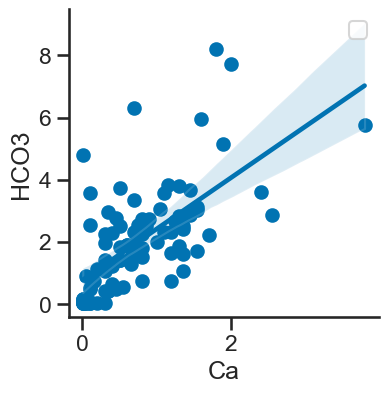

In [13]:
# Construcción de gráficos de dispersión

x=iris['Ca'] #Extract data used for x
y=iris['HCO3'] #Extract data used for y

plt.figure(figsize=(4,4)) #Create figure of dimensions 4x4 (width, height)
plt.scatter(x,y) #Make a scatter plot
#This seaborn function is a nice way to show the best fit line and its 95% confidence interval
#Could also use model to calculate line values and use plt.plot(xvals,yvals)
sns.regplot(x,y,scatter=False) #Label displays fit R^2
plt.legend() #Display legend

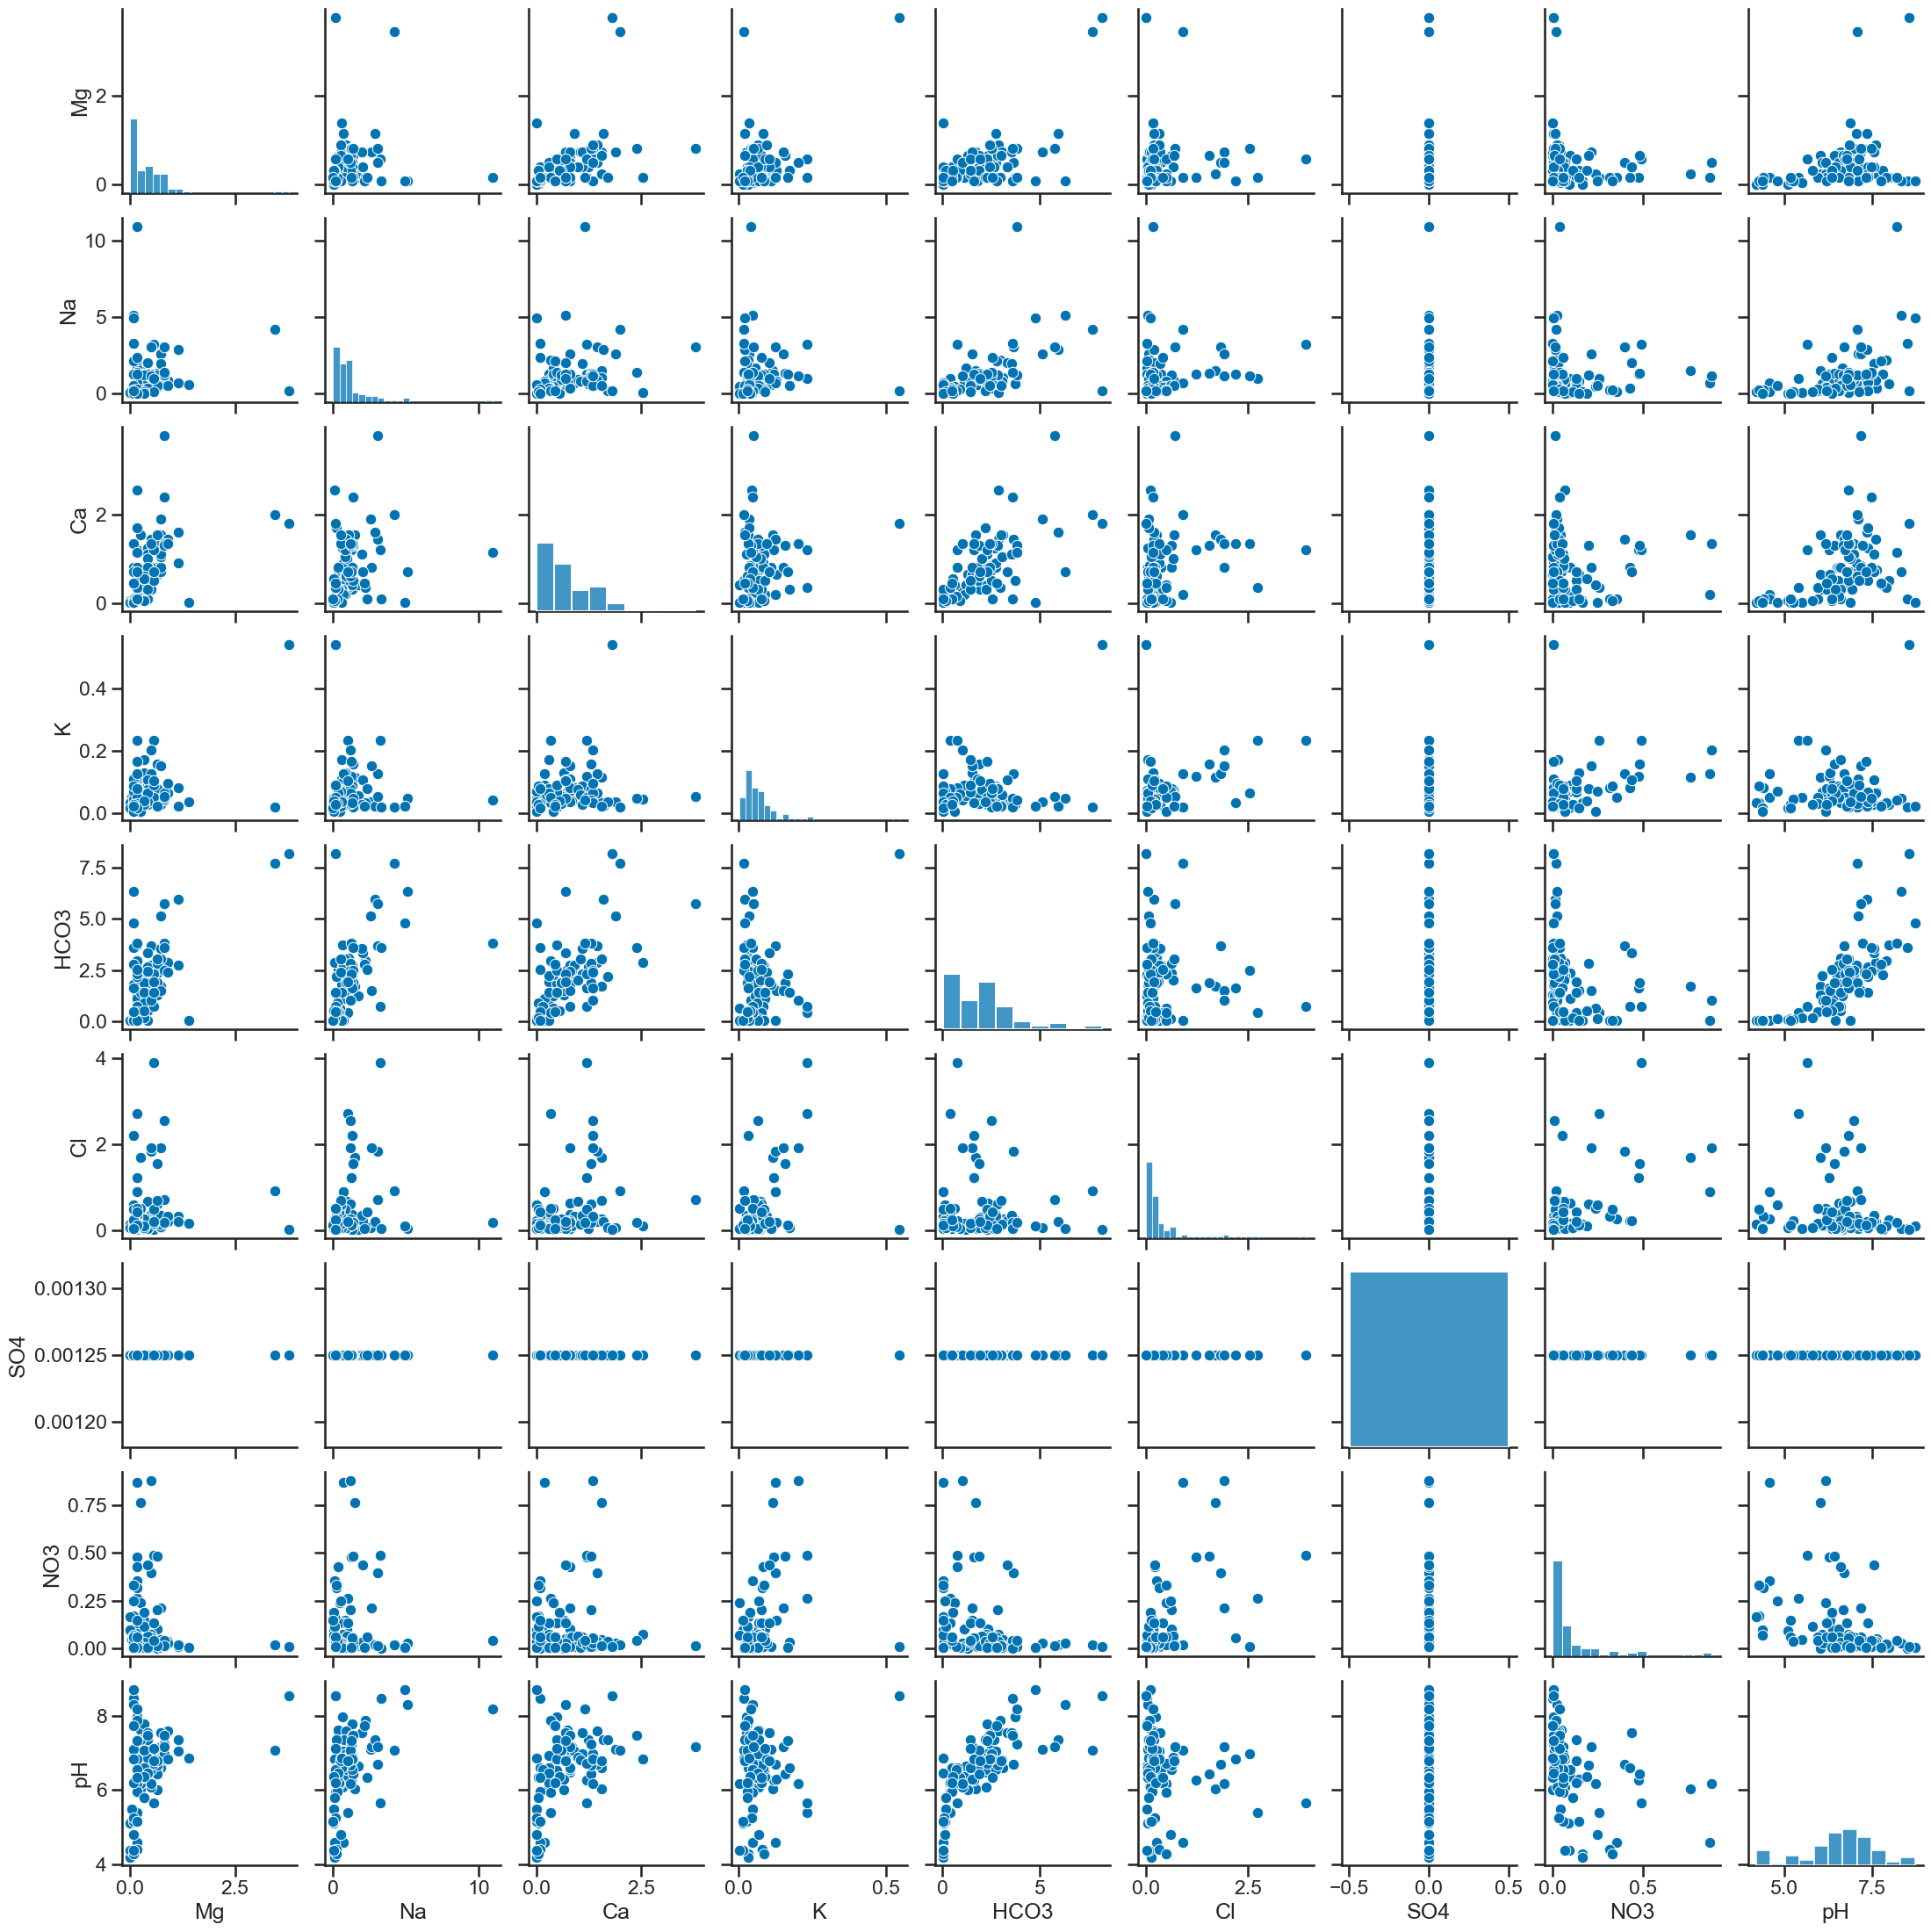

In [14]:
sns.pairplot(iris)

Se elimina SO4 pues se observa que más del 30 % de las mediciones probablemente se encuentran por debajo del límite detectable.
Es necesario revisar los resultados de laboratorio para tomar la decición de eliminar el parámetro del análisis.

In [15]:

iris = iris.drop('SO4', axis=1)
iris.head(3)

Mg        Na    Ca         K  HCO3        Cl       NO3    pH
0  0.246914  1.508696  1.55  0.115385  1.70  1.695775  0.762903  6.03
1  0.164609  1.273913  1.20  0.117949  1.62  1.216901  0.477419  6.27
2  0.246914  0.360870  0.75  0.066667  2.52  0.135211  0.051613  7.62

In [16]:
#Agregar el tipo de muestra a la base de datos
iris["tipo"] = df2.tipo


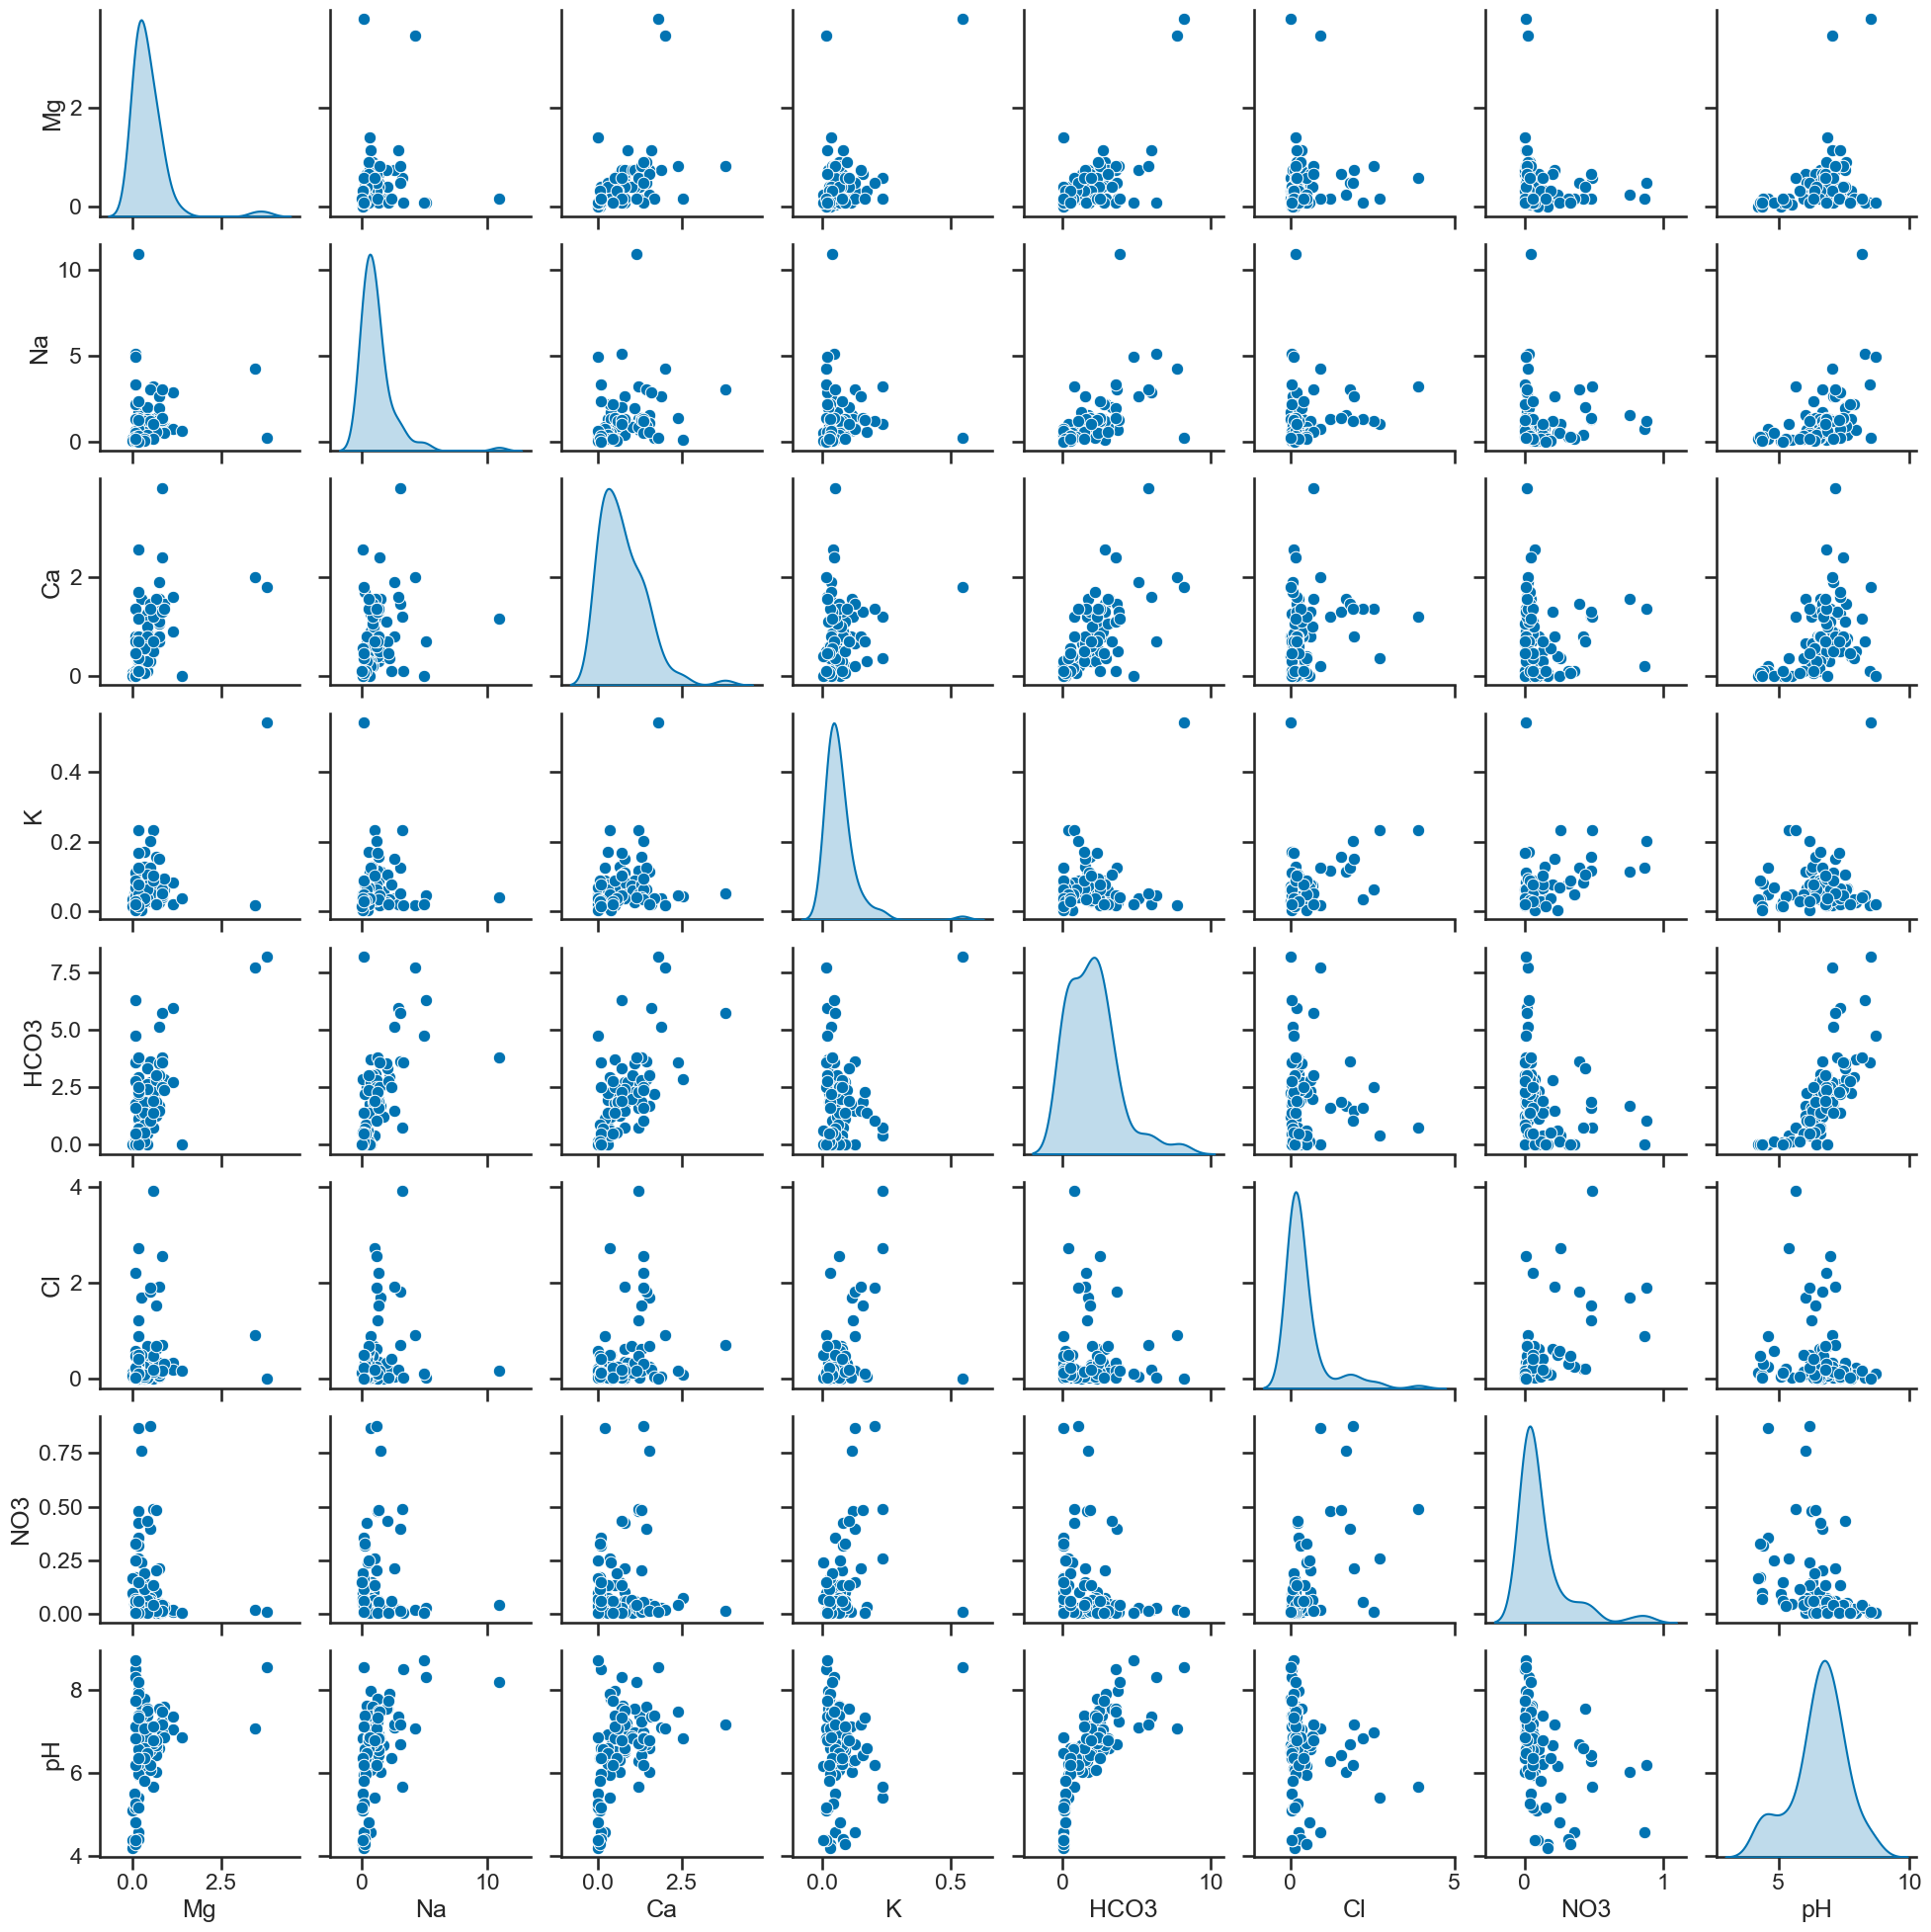

In [17]:
# En la diagonal, distribución de los datos
sns.pairplot(iris,diag_kind='kde')

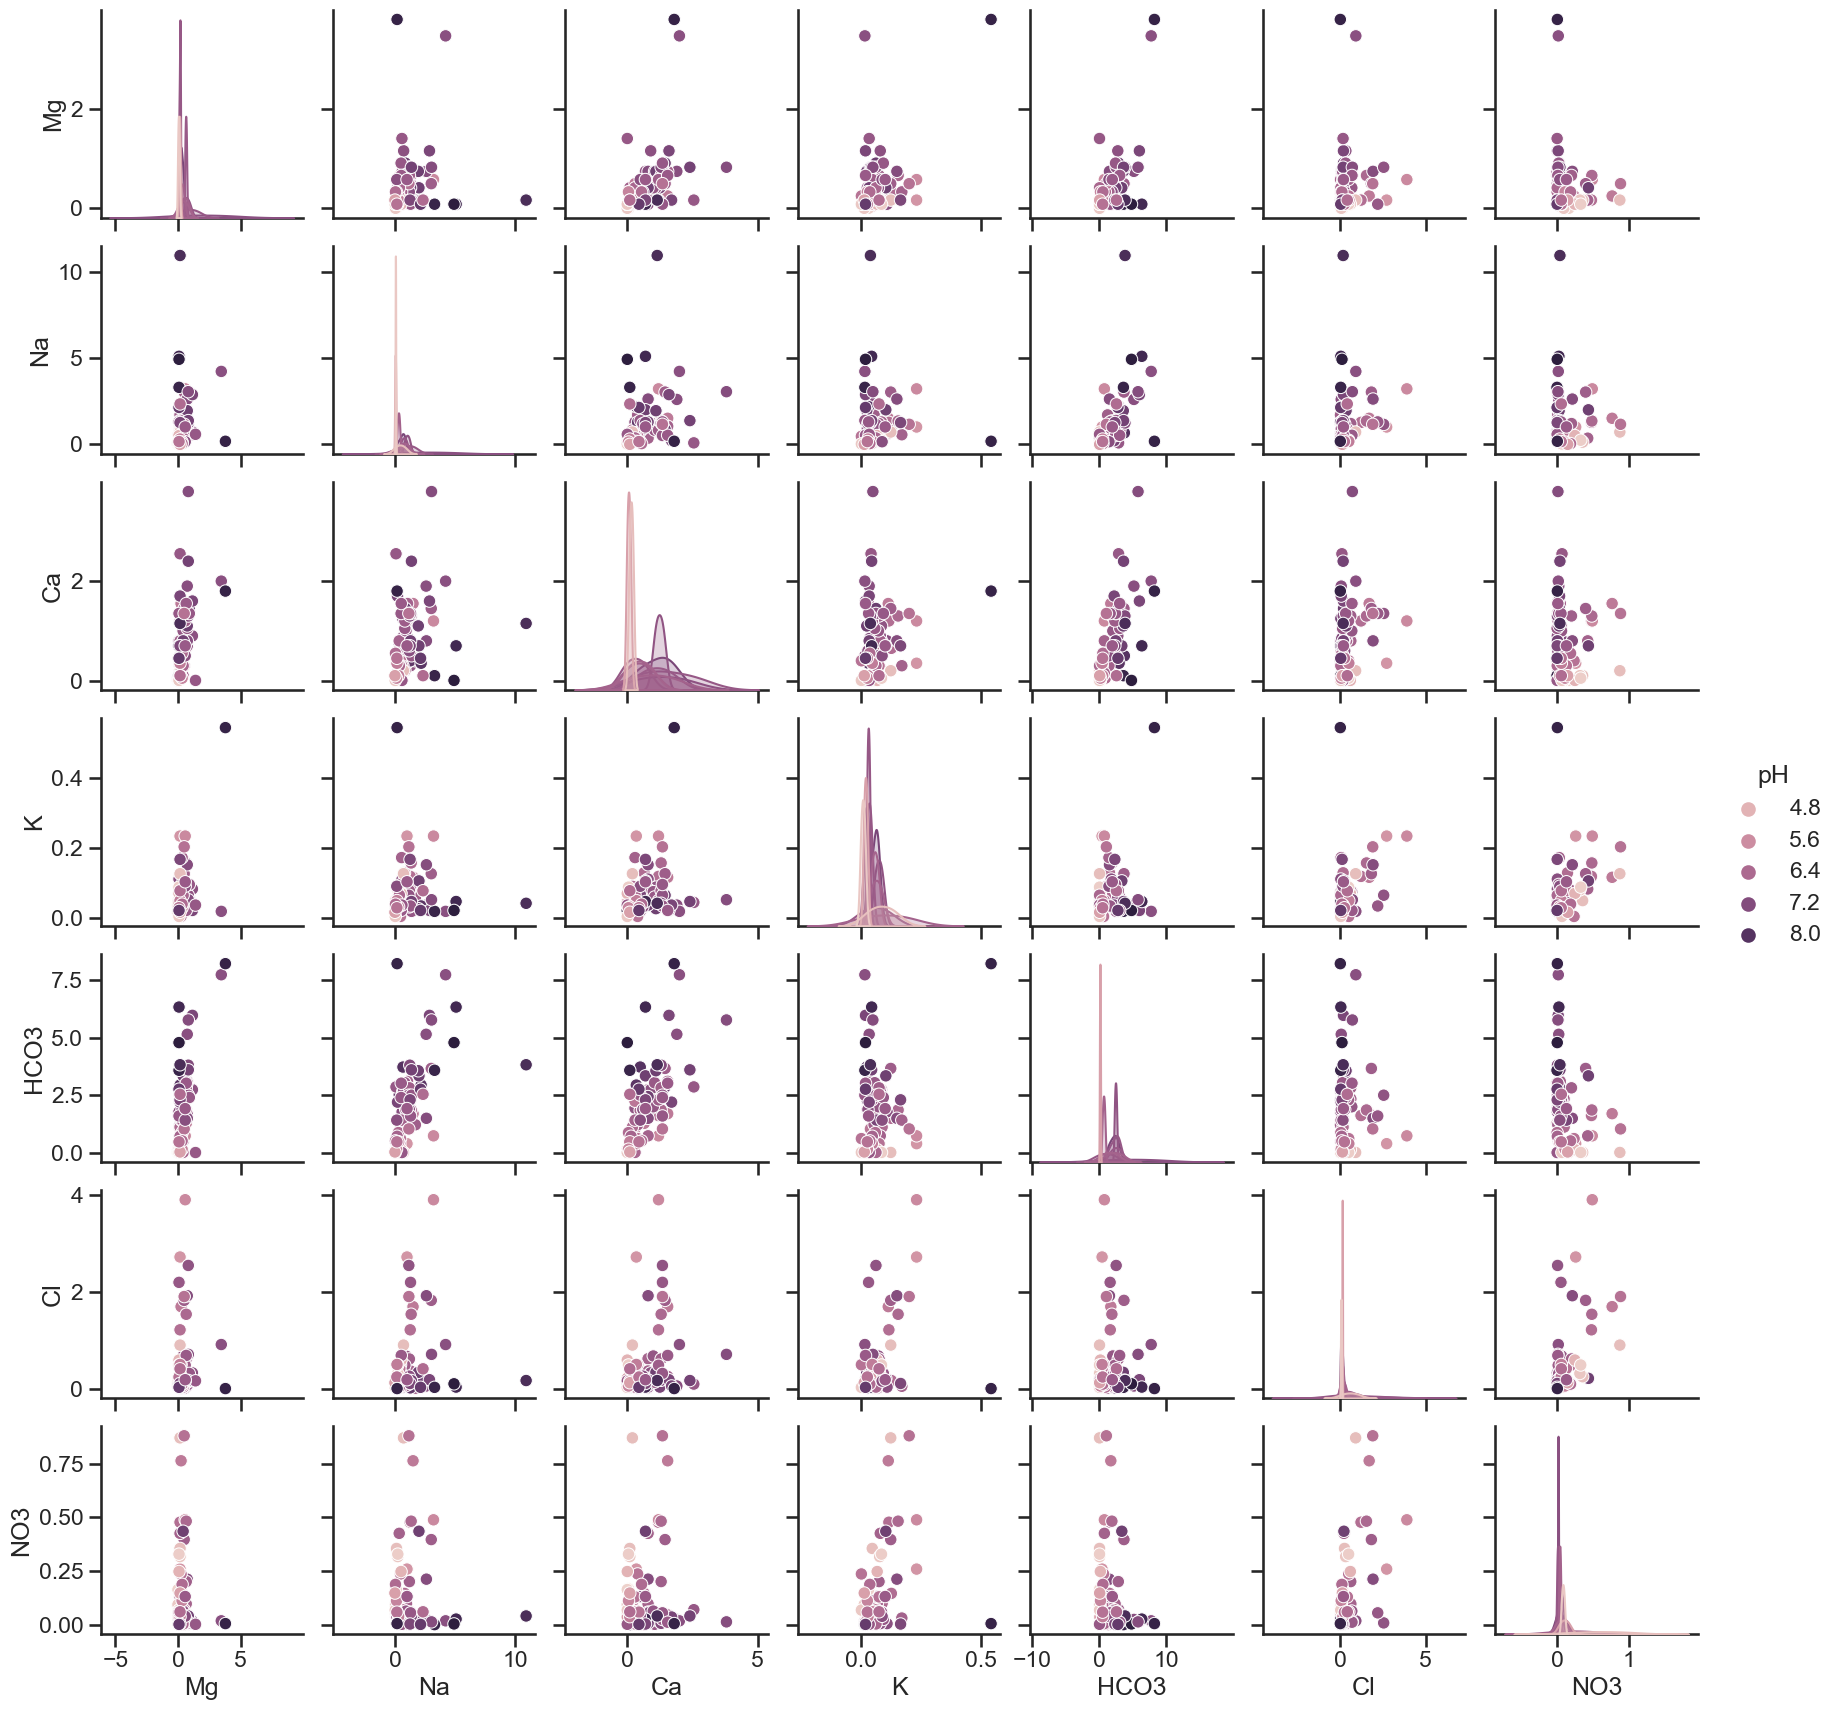

In [18]:
# En la diagonal, distribución de los datos según el pH
sns.pairplot(iris, hue='pH',diag_kind='kde')

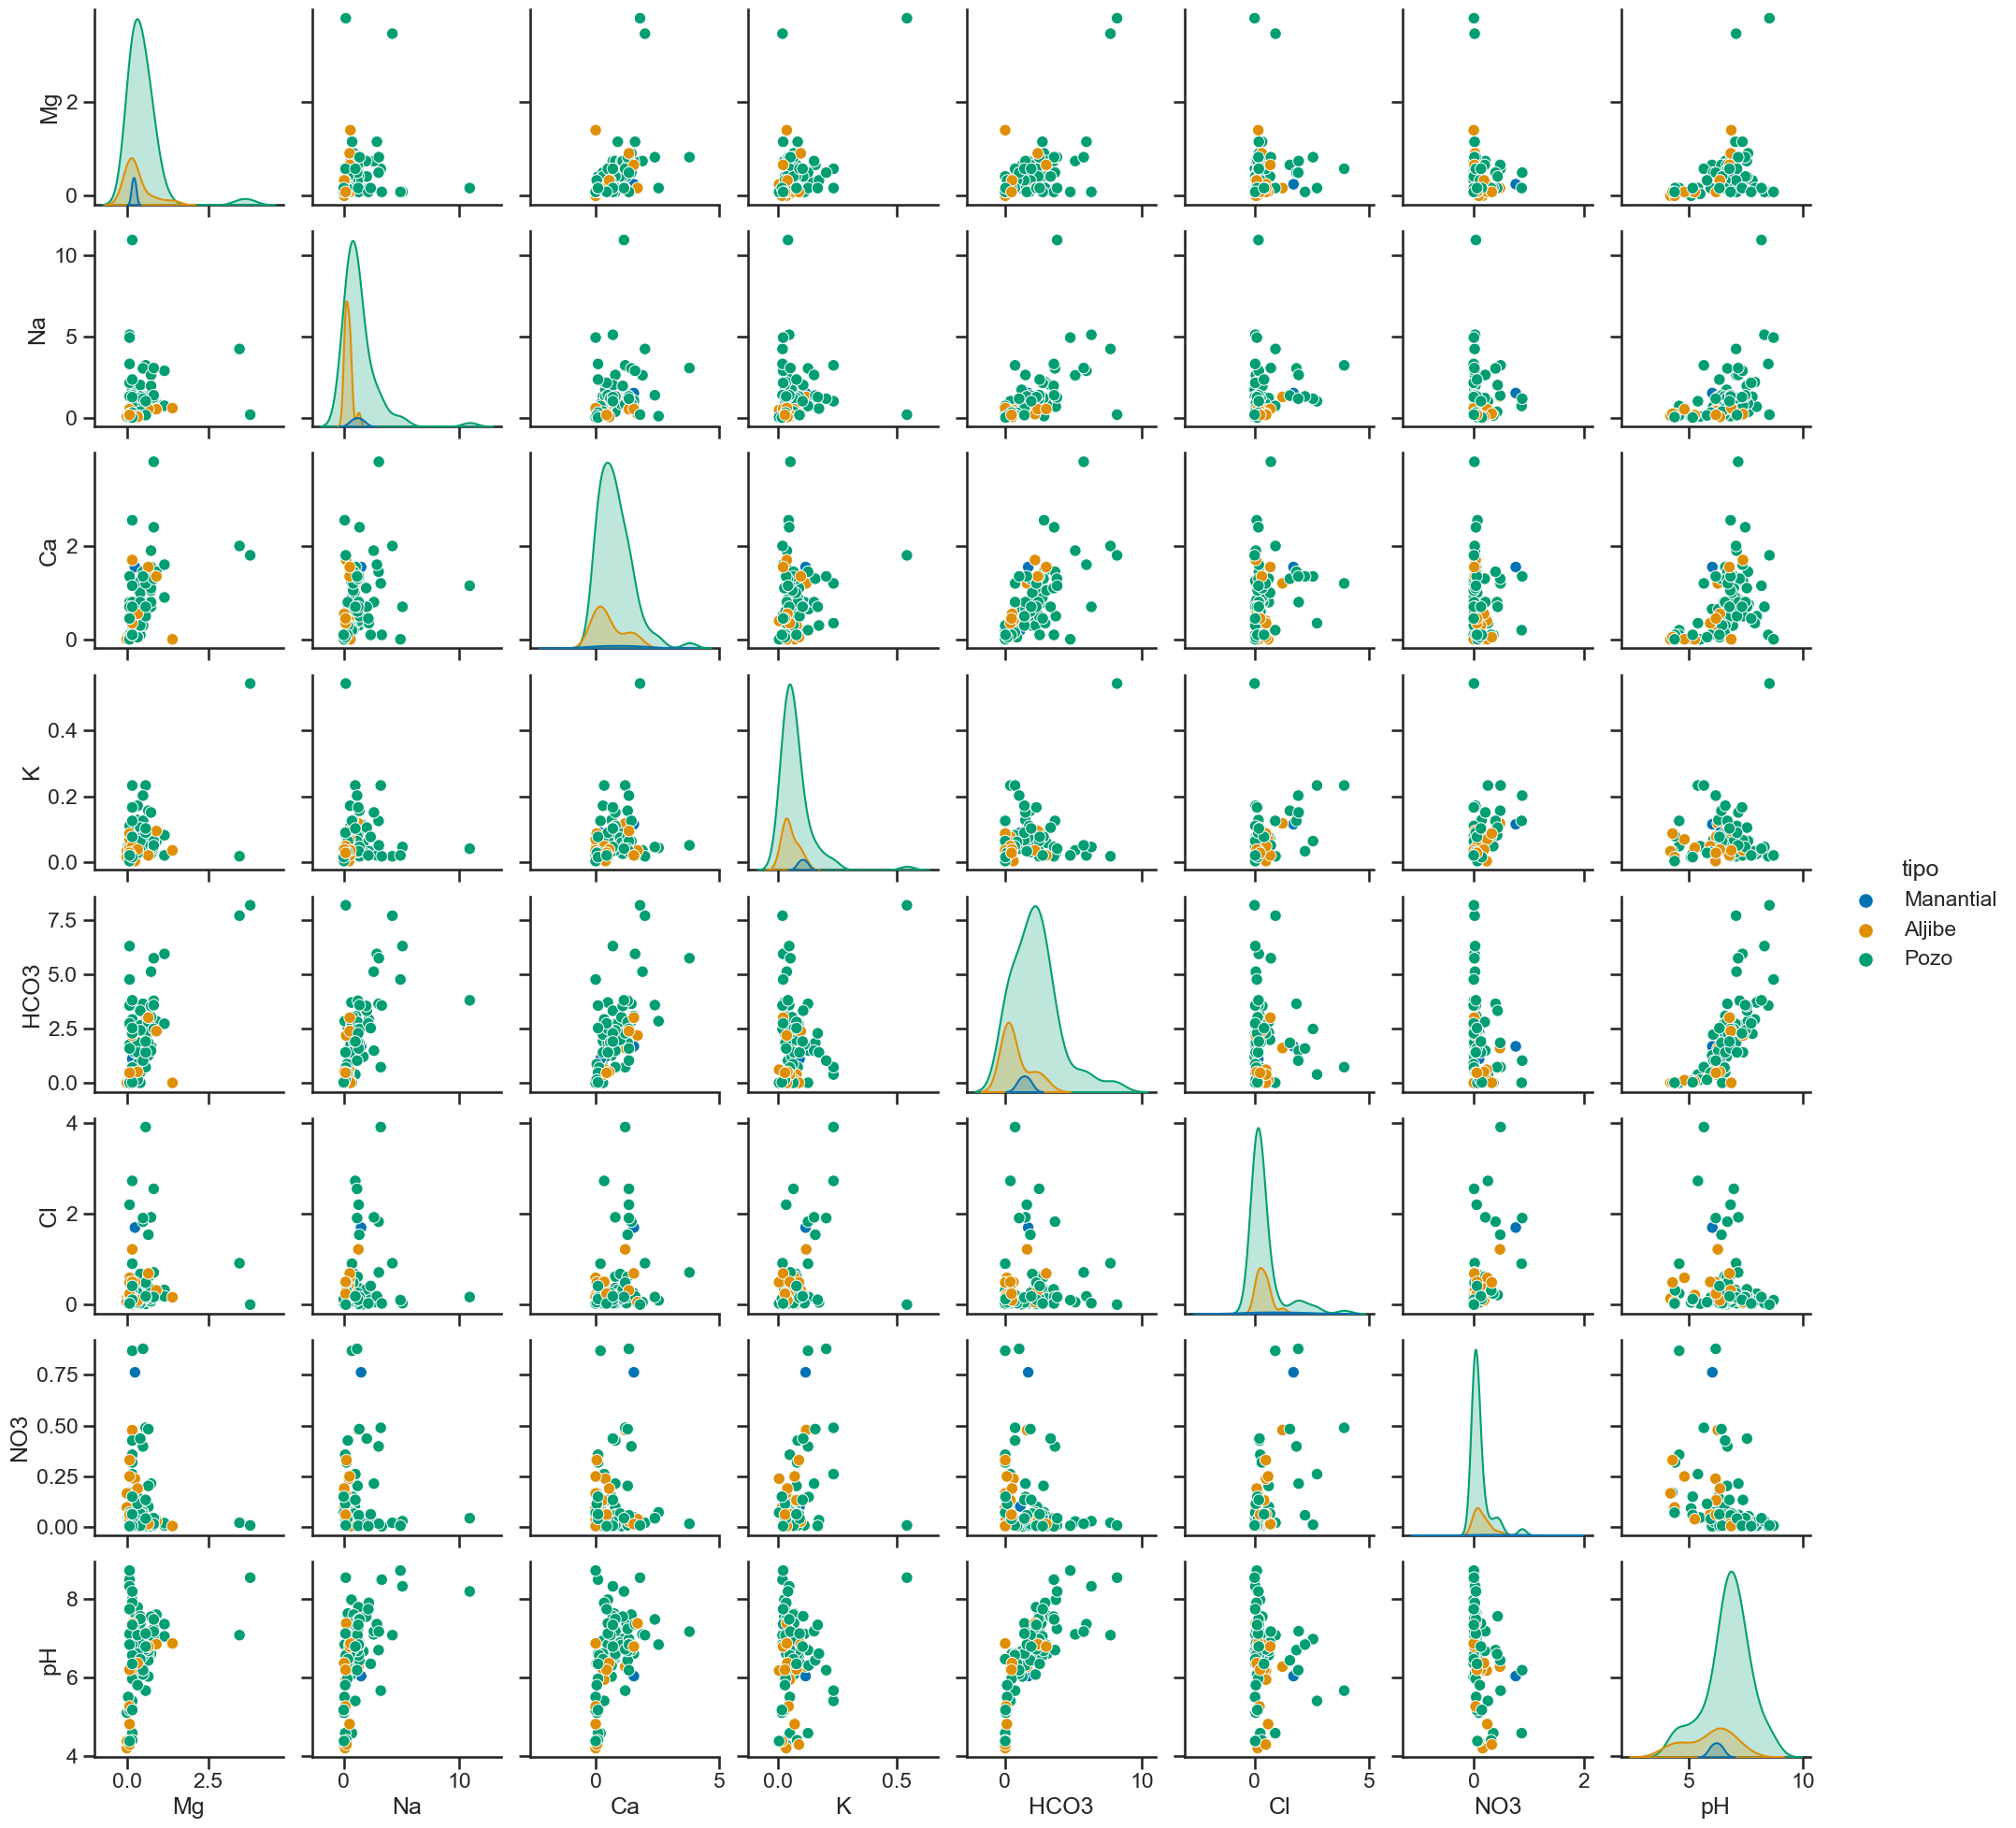

In [19]:
# # En la diagonal, distribución de los datos según el tipo de muestra
sns.pairplot(iris, hue="tipo",diag_kind='kde')

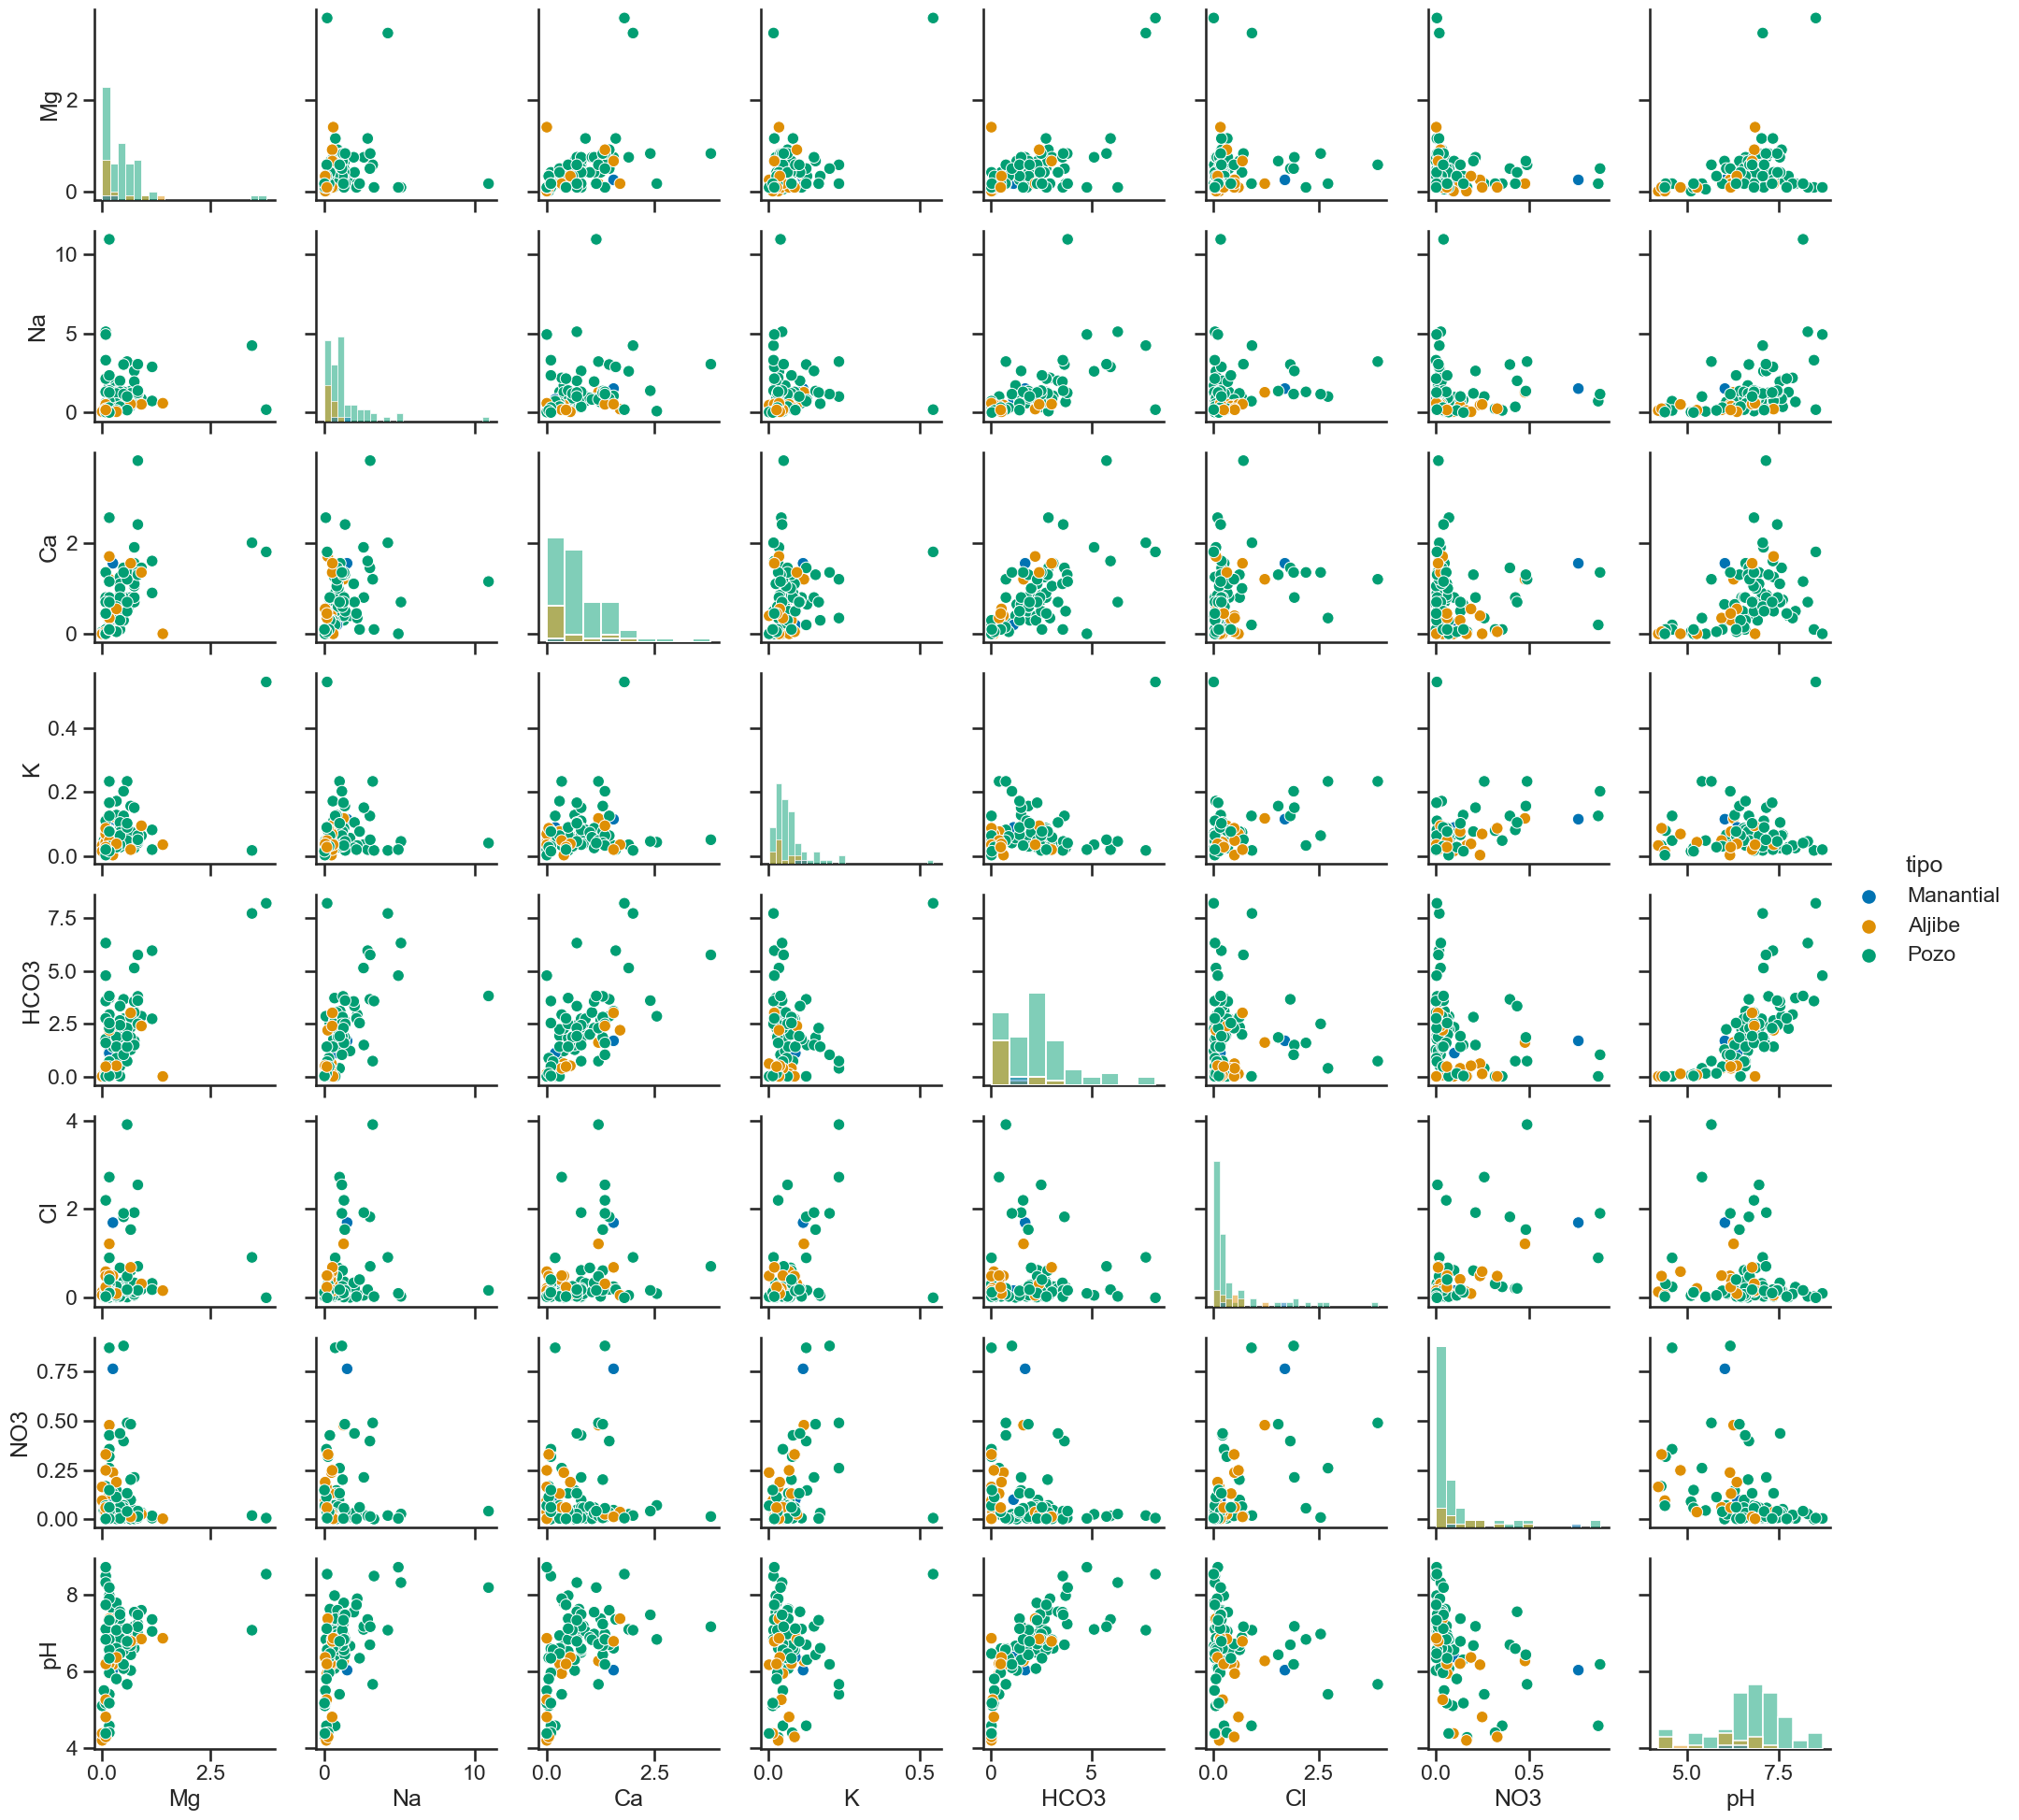

In [20]:
g = sns.PairGrid(iris, hue="tipo")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

Text(0.5, 0, '')

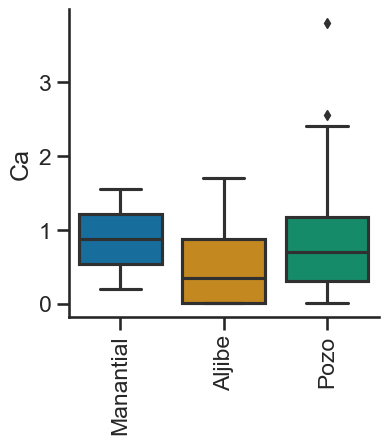

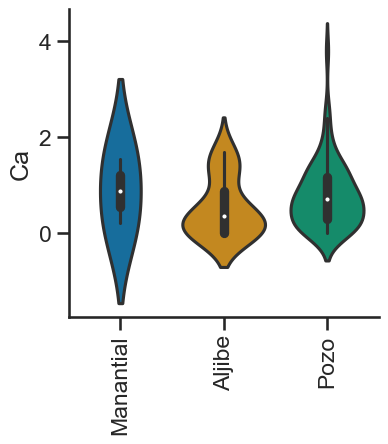

In [21]:
#A few more useful seaborn functions for visualizing differences in data

#Boxplot
plt.figure(figsize=(4,4))
sns.boxplot(x="tipo",y=iris.Ca,data=iris)
plt.xticks(rotation=90)
plt.xlabel('')

#Violin plot
plt.figure(figsize=(4,4))
sns.violinplot(x='tipo',y=iris.Ca,data=iris)
plt.xticks(rotation=90)
plt.xlabel('')

## Evaluación de la normalidad muestras


In [22]:
shapiro_test = stats.shapiro(iris.Ca)
shapiro_test

ShapiroResult(statistic=0.8792450428009033, pvalue=4.222871154979657e-07)

In [23]:
print(pg.normality(iris))

             W          pval  normal
Mg    0.581115  8.504583e-15   False
Na    0.645486  1.407156e-13   False
Ca    0.879245  4.222871e-07   False
K     0.640604  1.123642e-13   False
HCO3  0.890352  1.228266e-06   False
Cl    0.597231  1.665041e-14   False
NO3   0.645274  1.393458e-13   False
pH    0.955636  3.327846e-03   False


Ninguno de los parámetros se distribuye normalmente, entonces se deben buscar tranformaciones que permitan lograr una distribución normal de los datos. Una de las transformaciones más usadas es la tranfromación logarítmica. 
#### Actividad: consulte otras transformaciones e implementelas. 

In [24]:
iris1 = iris.drop('tipo', axis=1)
# Transformación logarítmica
Norm = np.log10(iris1) 
Norm.head(3)
print(pg.normality(Norm))

             W          pval  normal
Mg    0.661530  2.994691e-13   False
Na         NaN  1.000000e+00    True
Ca    0.821802  3.645770e-09   False
K     0.963958  1.207031e-02   False
HCO3  0.804572  1.062999e-09   False
Cl    0.986709  4.792675e-01    True
NO3   0.981490  2.167191e-01    True
pH    0.913922  1.475156e-05   False


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [25]:
#sns.pairplot(iris1,diag_kind='kde')

In [26]:
print(pg.normality(Norm))

             W          pval  normal
Mg    0.661530  2.994691e-13   False
Na         NaN  1.000000e+00    True
Ca    0.821802  3.645770e-09   False
K     0.963958  1.207031e-02   False
HCO3  0.804572  1.062999e-09   False
Cl    0.986709  4.792675e-01    True
NO3   0.981490  2.167191e-01    True
pH    0.913922  1.475156e-05   False


In [27]:
iris1 = iris.drop('tipo', axis=1)
# Transformación logaritmica
Norm = np.log10(iris1) 
Norm.head(3)
print(pg.normality(Norm))

             W          pval  normal
Mg    0.661530  2.994691e-13   False
Na         NaN  1.000000e+00    True
Ca    0.821802  3.645770e-09   False
K     0.963958  1.207031e-02   False
HCO3  0.804572  1.062999e-09   False
Cl    0.986709  4.792675e-01    True
NO3   0.981490  2.167191e-01    True
pH    0.913922  1.475156e-05   False


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


# Estandarización de datos

In [28]:
standardisedX = scale(iris1)
standardisedX = pd.DataFrame(standardisedX, index=iris1.index, columns=iris1.columns)

In [29]:
standardisedX.apply(np.mean)


Mg     -2.896234e-17
Na     -6.999232e-17
Ca      2.075634e-16
K       5.792468e-17
HCO3    2.606611e-16
Cl     -2.980707e-16
NO3     1.086088e-16
pH      3.065181e-16
dtype: float64

In [30]:
standardisedX.apply(np.std)

Mg      1.0
Na      1.0
Ca      1.0
K       1.0
HCO3    1.0
Cl      1.0
NO3     1.0
pH      1.0
dtype: float64

In [31]:
print(pg.normality(standardisedX))

             W          pval  normal
Mg    0.581115  8.504457e-15   False
Na    0.645485  1.407151e-13   False
Ca    0.879245  4.222923e-07   False
K     0.640604  1.123646e-13   False
HCO3  0.890352  1.228263e-06   False
Cl    0.597231  1.665041e-14   False
NO3   0.645274  1.393453e-13   False
pH    0.955636  3.327846e-03   False


# ANALISIS DE COMPONENTES PRINCIPALES

In [32]:
pca = PCA().fit(standardisedX)

In [33]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [34]:
summary = pca_summary(pca, standardisedX)

Importance of components:


sdev                varprop               cumprop
    Standard deviation Proportion of Variance Cumulative Proportion
PC1           1.751160               0.383320              0.383320
PC2           1.408003               0.247809              0.631130
PC3           1.054777               0.139069              0.770199
PC4           0.805680               0.081140              0.851339
PC5           0.655760               0.053753              0.905092
PC6           0.652567               0.053230              0.958322
PC7           0.471249               0.027759              0.986082
PC8           0.333687               0.013918              1.000000

## Selección de número de componentes principales a retener

### Scree plot
Se pueden retener los componentes de acuerdo con el cambio de pendiente más fuerte en el Scree plot (hasta el componente 4). 

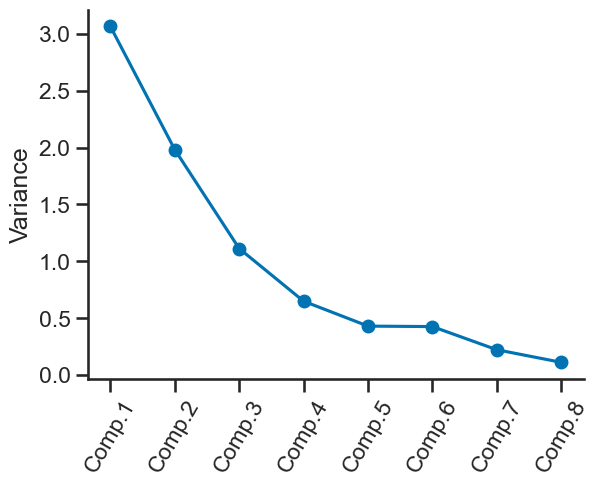

In [35]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardisedX)

### Citerio de Kaisser
Se pueden retener los componentes cuya varianza este por encima de 1. Para el ejemplo se conservarían los tres primeros componentes.

In [36]:
summary.sdev**2


Standard deviation
PC1            3.066563
PC2            1.982474
PC3            1.112555
PC4            0.649121
PC5            0.430021
PC6            0.425844
PC7            0.222076
PC8            0.111347

### Varianza acumulada
Se puede tambien verificar el porcentaje acumulado de la varianza explicada por los componentes. Es importante observar que con sólo 2 componentes se alcanza un 61% y con el tercer componente hasta el 78%.

## Pesos de los Componentes principales

In [37]:
#%pip install pca

In [38]:
from pca import pca
import matplotlib as mpl
import colourmap


In [39]:
#Asignar índices a la base de datos.
label = iris1.columns
standardisedX.set_index(iris.tipo, inplace=True) 
print(standardisedX)

                 Mg        Na        Ca         K      HCO3        Cl  \
tipo                                                                    
Manantial -0.361104  0.235653  1.197467  0.672769 -0.168252  1.880365   
Aljibe    -0.509082  0.075192  0.677146  0.710501 -0.215451  1.171344   
Pozo      -0.361104 -0.548824  0.008160 -0.044138  0.315539 -0.430209   
Pozo       0.230809  0.042505  0.082492  0.031326  0.150342 -0.605379   
Pozo       0.082831  0.087078 -0.660825 -0.006406 -0.026655 -0.196649   
...             ...       ...       ...       ...       ...       ...   
Pozo      -0.509082  0.066277 -0.066171  1.427408  0.185741 -0.470248   
Pozo      -0.657060  0.663549 -0.437830 -0.723314  0.457136 -0.587862   
Pozo      -0.509082  0.803210 -0.958152  0.106790  0.327339 -0.021479   
Pozo       0.230809 -0.106070 -0.066171  0.484109 -0.038454 -0.355136   
Pozo       6.001955 -0.673627  1.569126  6.974007  3.666674 -0.626232   

                NO3        pH  
tipo              

In [40]:
model = pca(n_components=0.95)
#model = pca(n_components=3) #Solo conserva 3 componentes

In [41]:
results = model.fit_transform(standardisedX)
results

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


{'loadings':            Mg        Na        Ca         K      HCO3        Cl       NO3  \
 PC1  0.400770  0.331729  0.421433  0.174418  0.539944  0.046483 -0.147545   
 PC2  0.135891 -0.019759  0.167299  0.480585 -0.081114  0.579515  0.575047   
 PC3  0.505165 -0.654596 -0.038548  0.407298 -0.011828 -0.294801 -0.220215   
 PC4  0.024297 -0.368413  0.710243 -0.529983  0.012387  0.139732 -0.014351   
 PC5  0.550664  0.399538 -0.187170 -0.277823  0.136016 -0.176175  0.136854   
 PC6  0.195998  0.048906 -0.204975 -0.075010 -0.165942  0.673139 -0.652326   
 
            pH  
 PC1  0.453698  
 PC2 -0.221577  
 PC3 -0.115724  
 PC4 -0.241805  
 PC5 -0.597204  
 PC6 -0.073277  ,
 'PC':                 PC1       PC2       PC3       PC4       PC5       PC6
 Manantial -0.214469  3.748956 -1.389088  0.734498 -0.066405 -1.359216
 Aljibe    -0.256241  2.292149 -0.792484  0.265911 -0.365773 -0.745629
 Pozo       0.351714 -0.777167  0.240270 -0.083285 -0.968442 -0.276318
 Pozo       0.250824 -0.607261

In [42]:
print("Varianza:", results['variance_ratio'])
print("Varianza acumulada:", results['explained_var'])


Varianza: [0.38332034 0.24780921 0.13906943 0.08114008 0.05375262 0.05323045
 0.02775948 0.01391838]
Varianza acumulada: [0.38332034 0.63112955 0.77019898 0.85133906 0.90509168 0.95832213
 0.98608162 1.        ]


In [43]:
print("Pesos:", results['loadings'])

Pesos:            Mg        Na        Ca         K      HCO3        Cl       NO3  \
PC1  0.400770  0.331729  0.421433  0.174418  0.539944  0.046483 -0.147545   
PC2  0.135891 -0.019759  0.167299  0.480585 -0.081114  0.579515  0.575047   
PC3  0.505165 -0.654596 -0.038548  0.407298 -0.011828 -0.294801 -0.220215   
PC4  0.024297 -0.368413  0.710243 -0.529983  0.012387  0.139732 -0.014351   
PC5  0.550664  0.399538 -0.187170 -0.277823  0.136016 -0.176175  0.136854   
PC6  0.195998  0.048906 -0.204975 -0.075010 -0.165942  0.673139 -0.652326   

           pH  
PC1  0.453698  
PC2 -0.221577  
PC3 -0.115724  
PC4 -0.241805  
PC5 -0.597204  
PC6 -0.073277  


[scatterd] >INFO> Create scatterplot


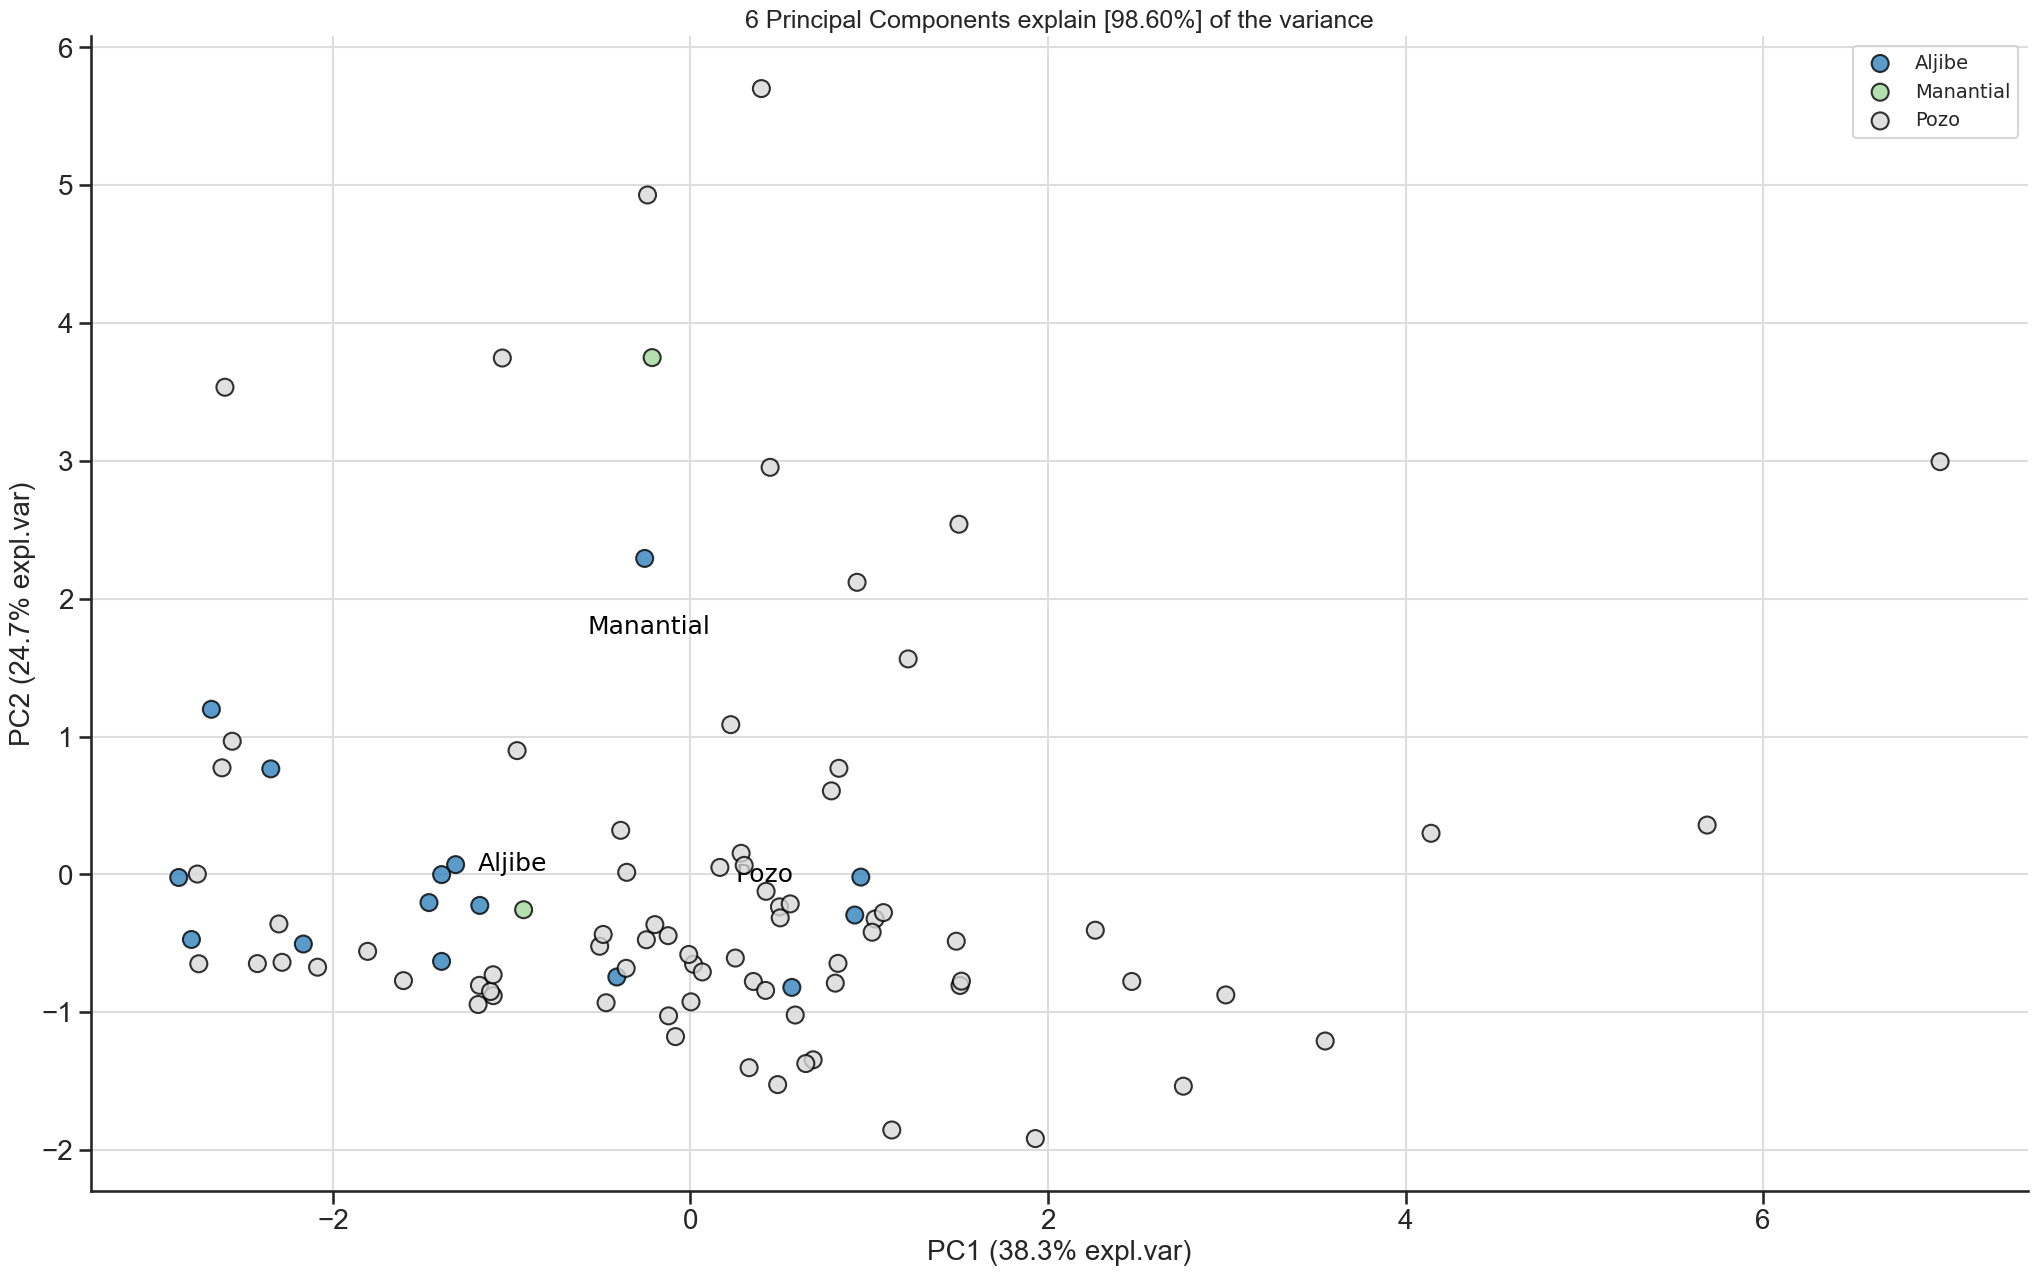

In [44]:
fig, ax = model.scatter()

In [45]:
#fig, ax = model.scatter3d()

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


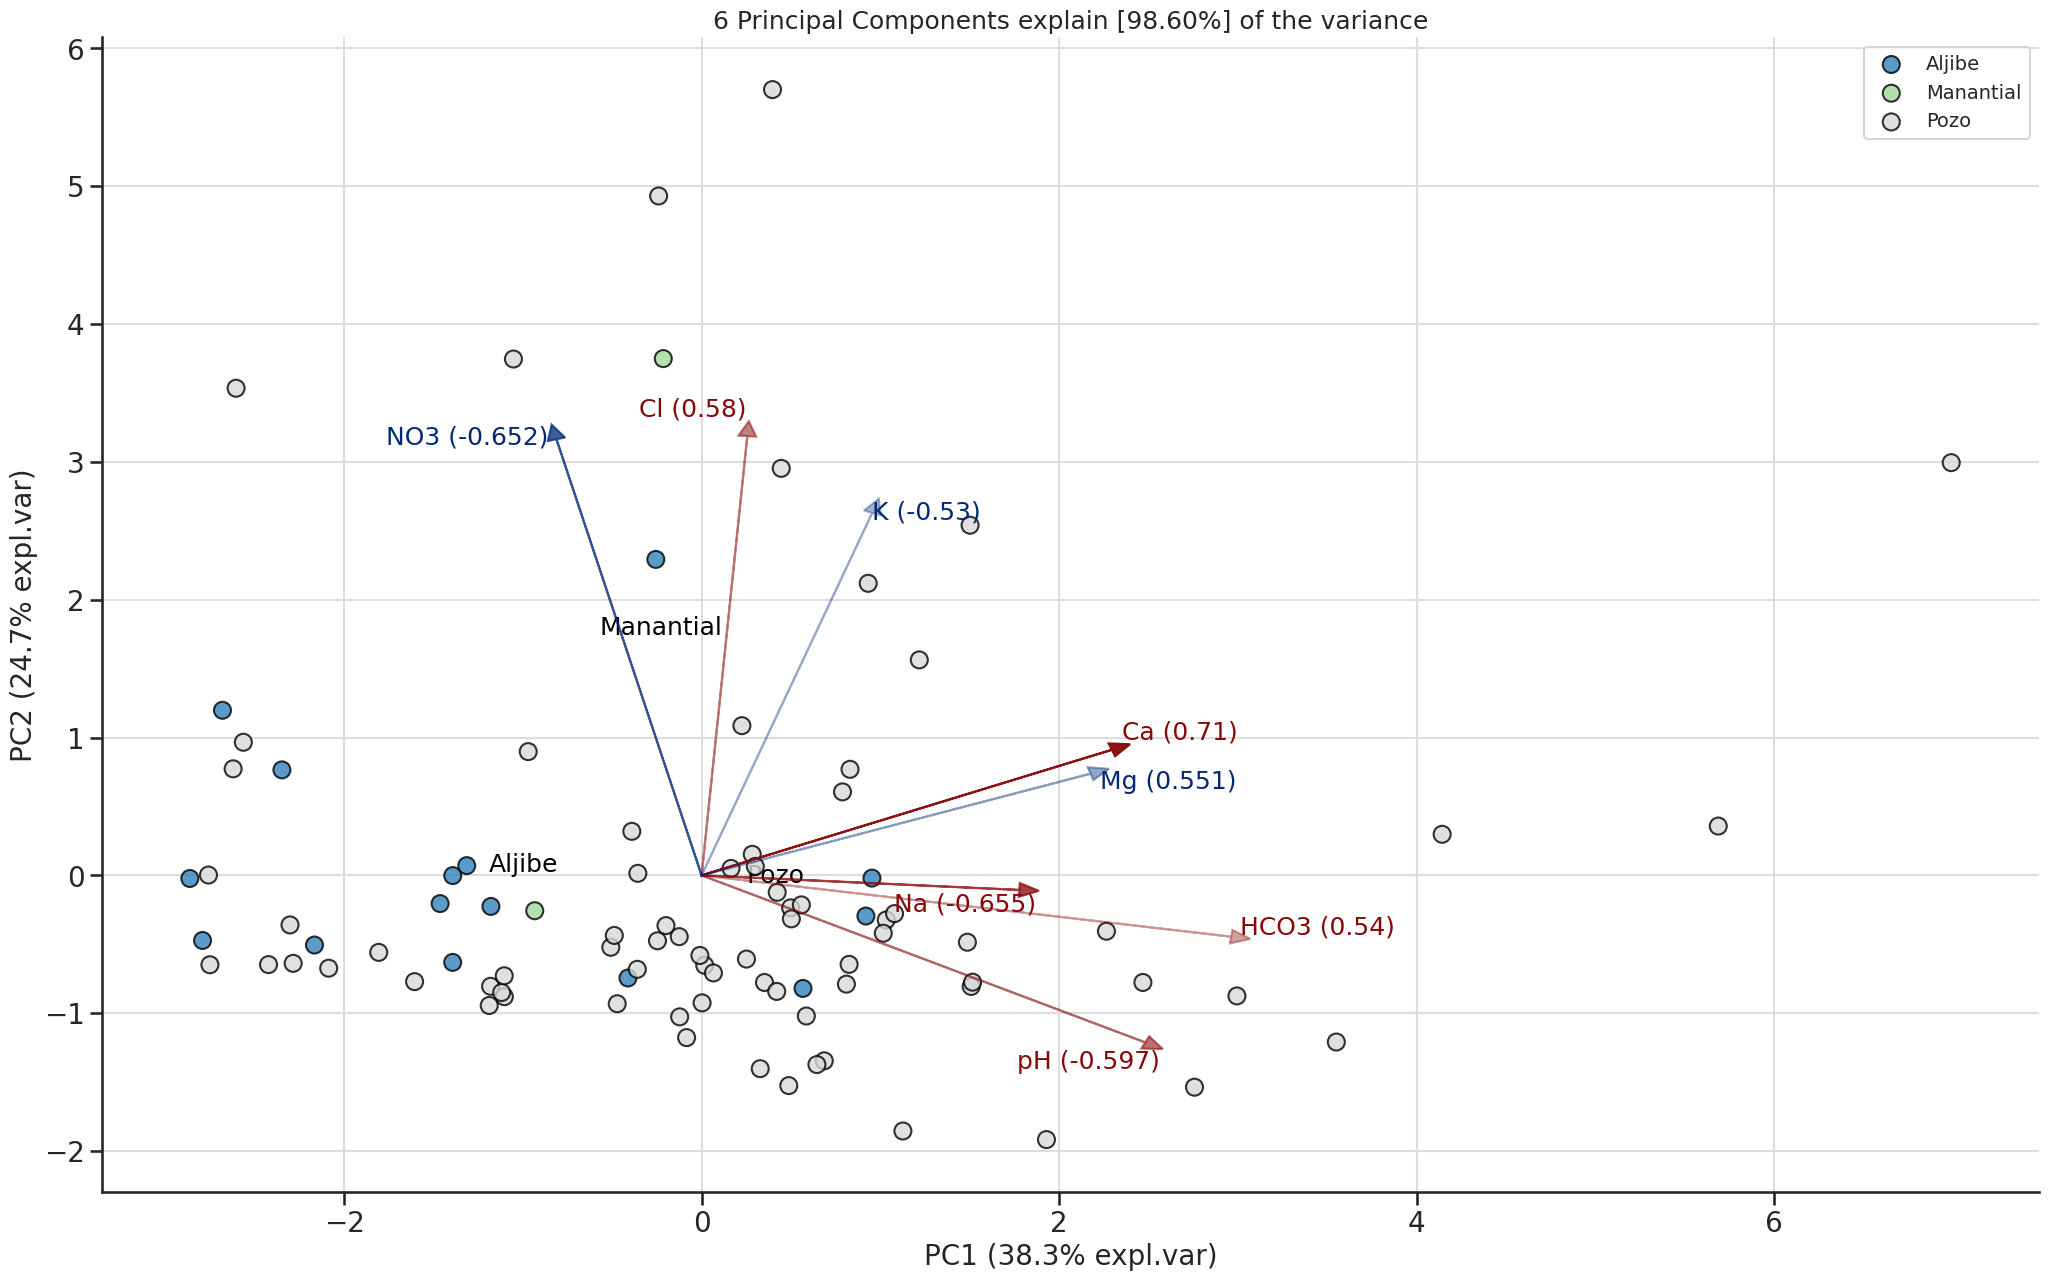

In [46]:
fig, ax = model.biplot(n_feat=9, PC=[0,1])


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot:title={'center':'6 Principal Components explain [98.60%] of the variance'}, xlabel='PC1 (38.3% expl.var)', ylabel='PC2 (24.7% expl.var)'>)

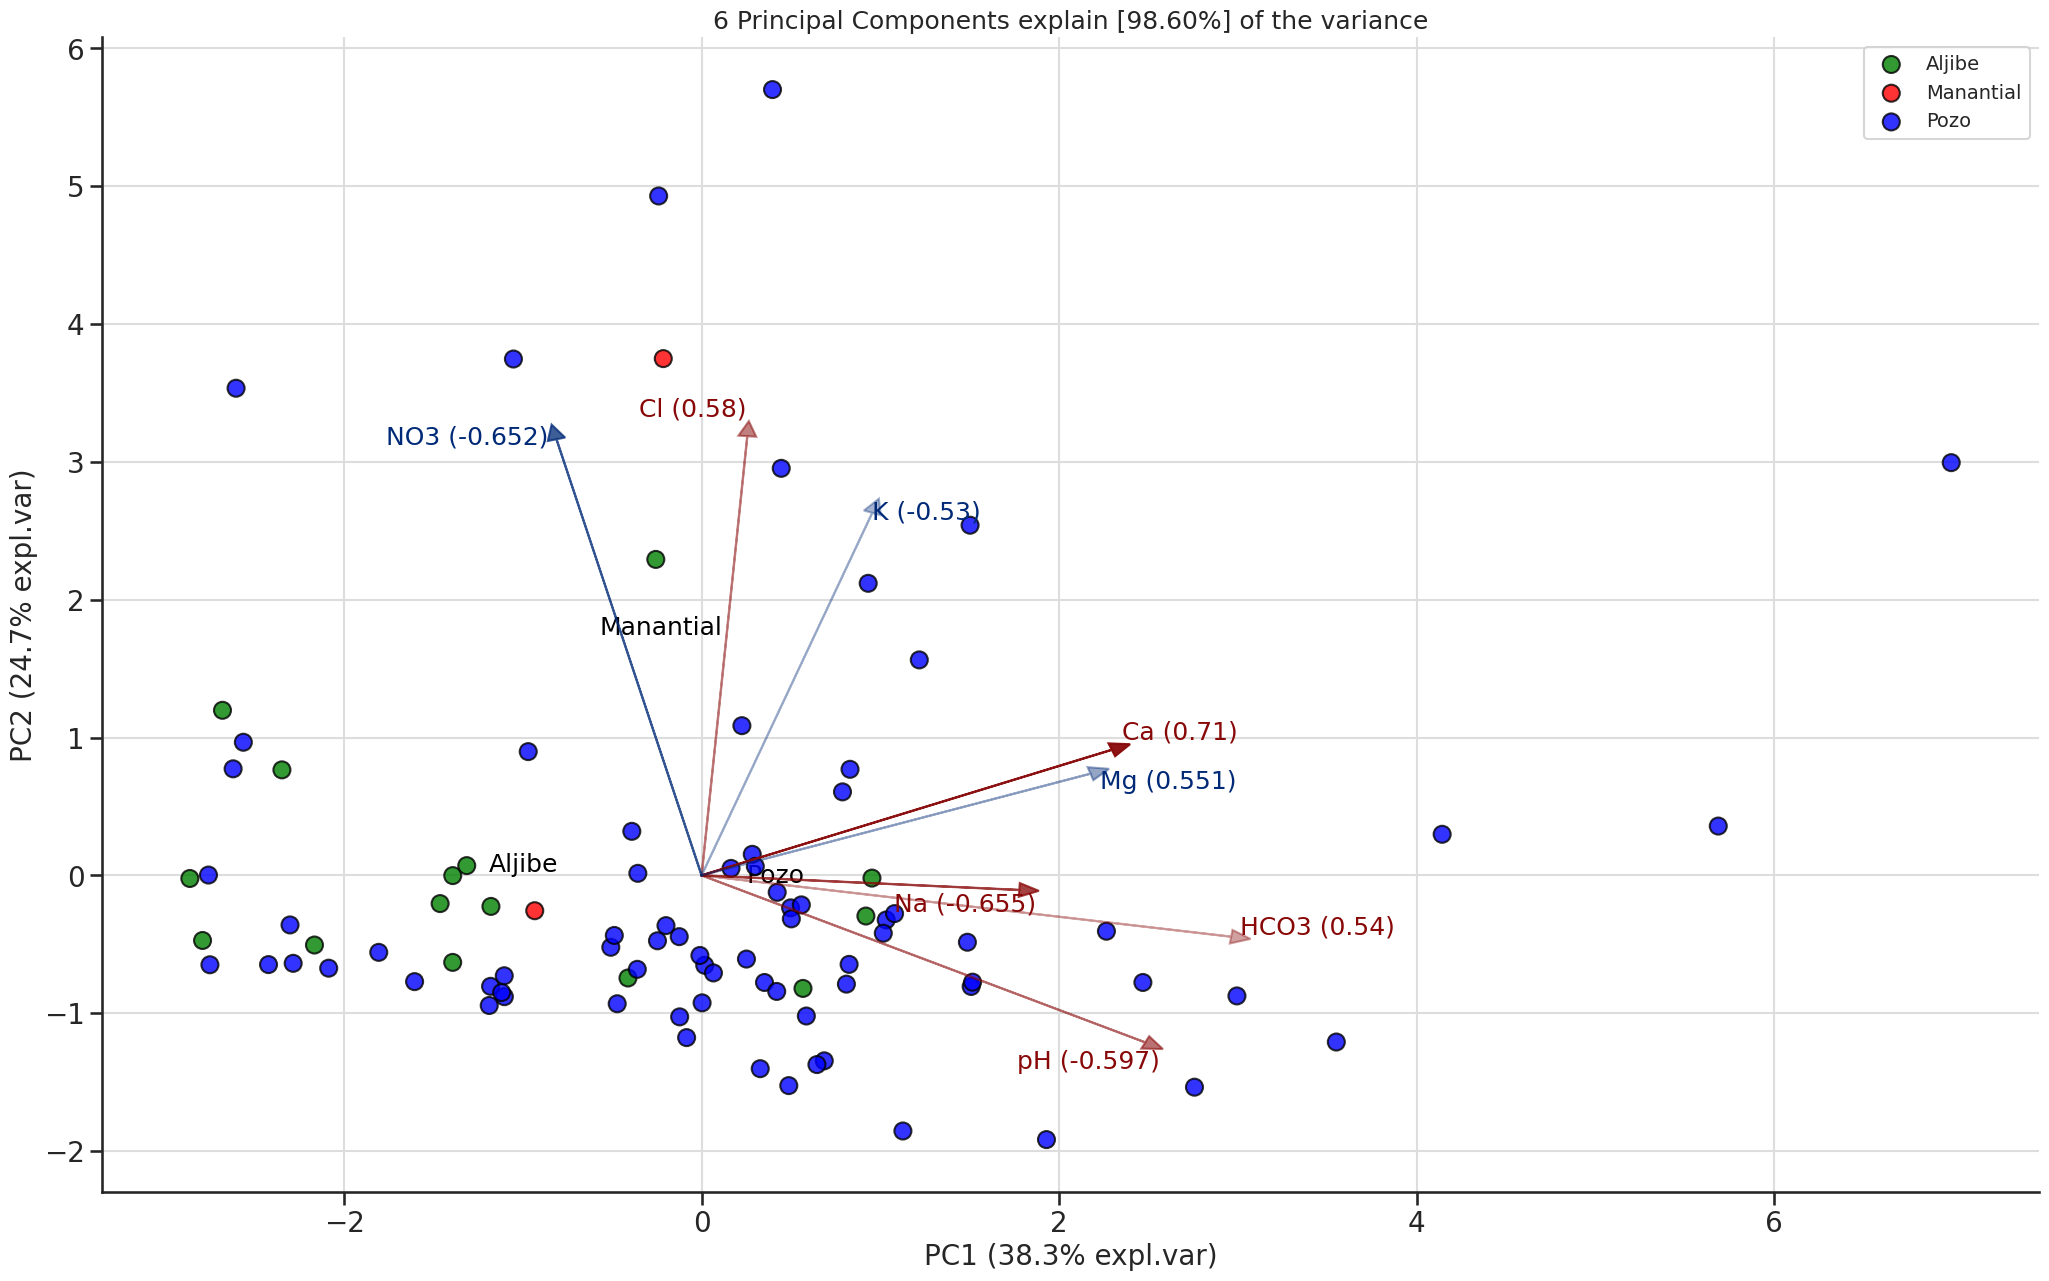

In [47]:

model.biplot(cmap=mpl.colors.ListedColormap(['green', 'red', 'blue']))


In [48]:
# Set custom classlabels. Coloring is based on the input colormap (cmap).
#y[10:15]=4  #Columna que contiene los clusters
#model.biplot(labels=y, cmap='Set2')


# Agrupamiento de datos

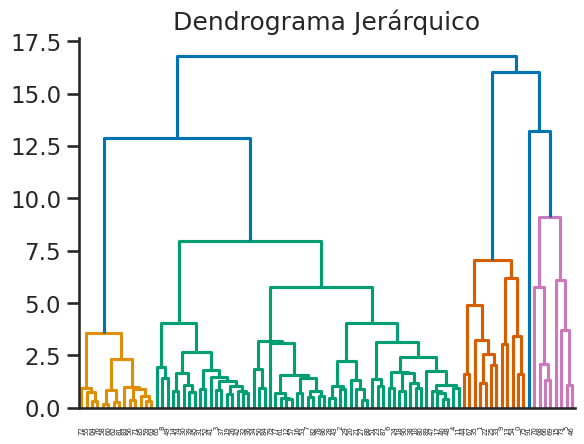

In [49]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Enlace jerárquico
enlace = linkage(standardisedX, 'ward')

# Dendrograma
dendrograma = dendrogram(enlace)

# Mostrar el dendrograma
plt.title('Dendrograma Jerárquico')
plt.show()

In [50]:
a = dendrograma['leaves_color_list']
len(a)

92

In [51]:
standardisedX['cluster'] = dendrograma['leaves_color_list']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_kde.py:564: RuntimeWarning: Degrees of freedom <= 0 for slice
  self._data_covariance = atleast_2d(cov(self.dataset, rowvar=1,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot:title={'center':'6 Principal Components explain [98.60%] of the variance'}, xlabel='PC1 (38.3% expl.var)', ylabel='PC2 (24.7% expl.var)'>)

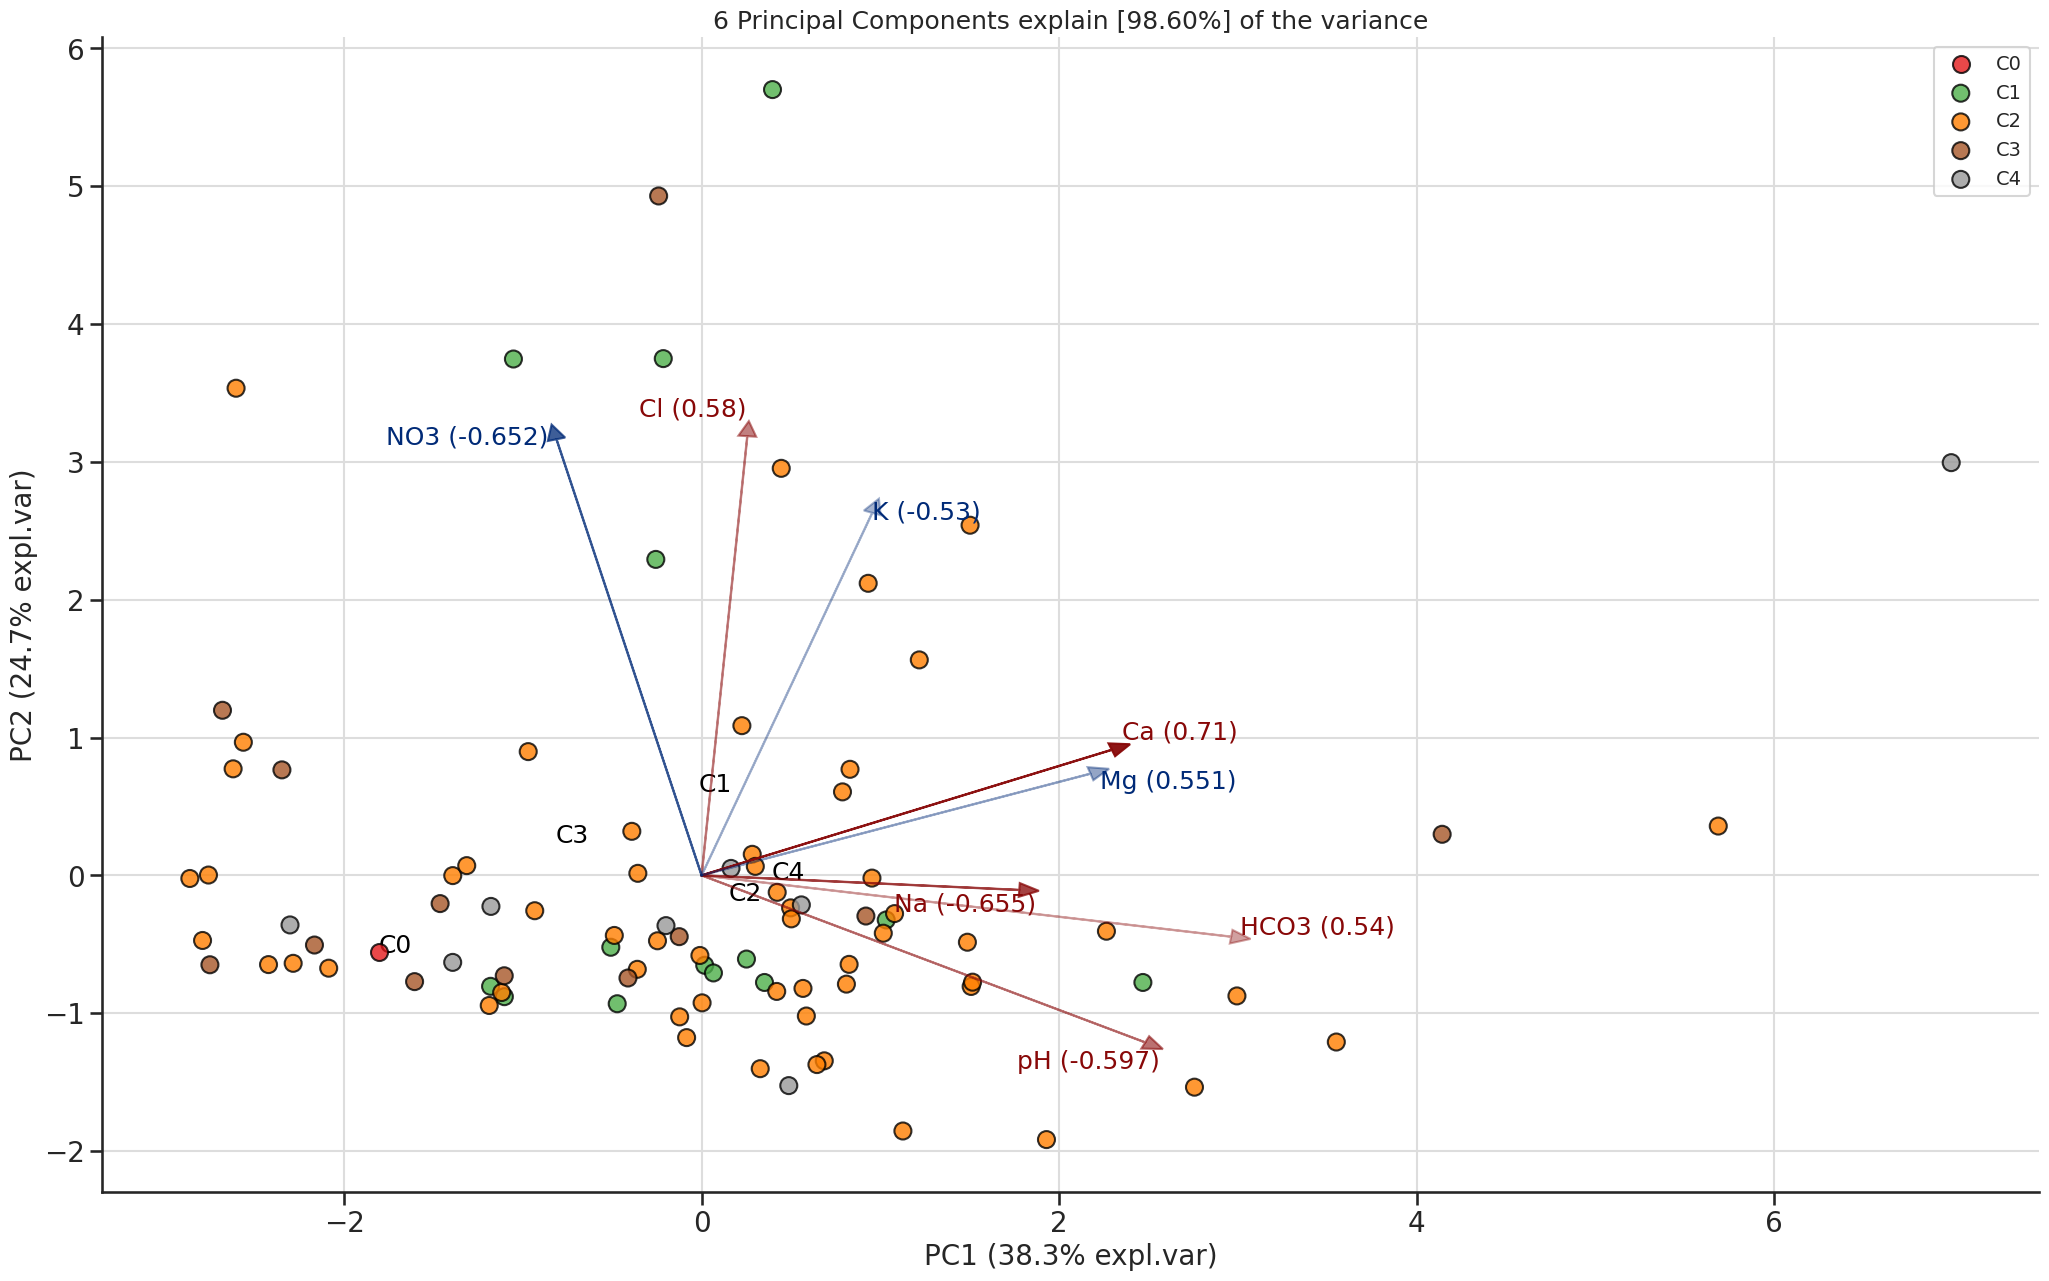

In [53]:
# Set custom classlabels. Coloring is based on the input colormap (cmap).
y= standardisedX['cluster']  #Columna que contiene los clusters
model.biplot(labels=y, cmap='Set1')


# Actividad
Realice una caracterización hidrogeoquímica del campus UN del año hidrológico  disponible, utilizando herramientas como el análisis estadístico multivariadoestadítico y los gráficos hidrogeoquiímicos vistos en clase. 